# Bees Data Challenge
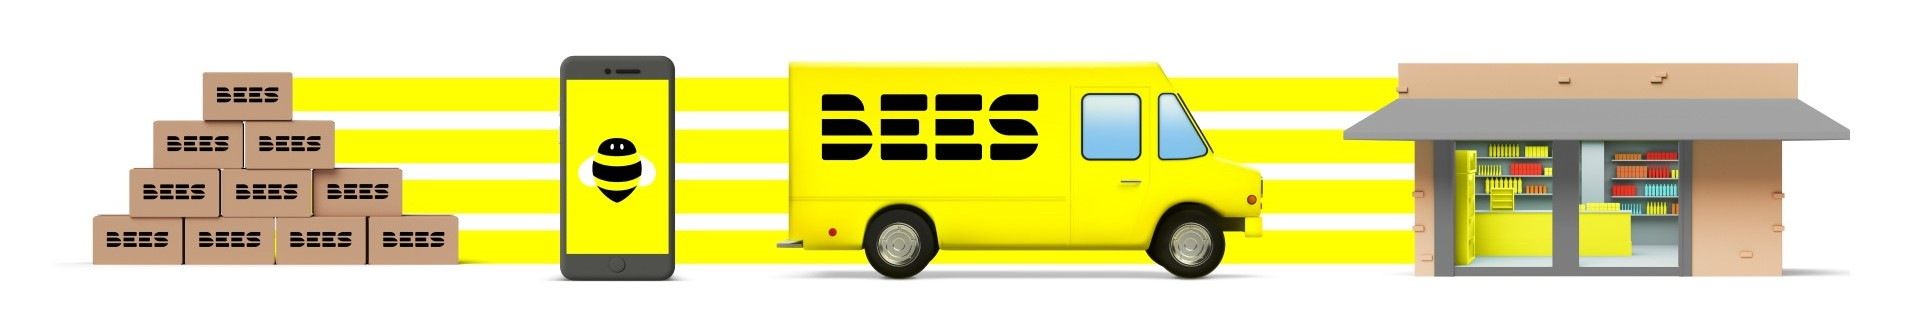


</br>

### Questions:

1. **Customer Segmentation:** Can you segment customers based on their ordering 
behavior, such as frequency, time of day, or days since prior order, to better 
understand their preferences and propose ways to optimize marketing strategies?


2. **Inventory Management:** Implement a model to predict inventory levels for individual 
products in different departments and aisles based on historical order data, order 
frequency, and seasonality? Please use the designated test sample in the dataset to 
evaluate model performance. How can this model be used to optimize stock levels 
and reduce waste?


3. **Order Fulfillment (Bonus points):** How can we optimize the order fulfillment 
process, considering factors like day of the week and time of day when most orders 
are placed, to ensure timely and efficient deliveries to customers while minimizing 
operational costs?




</br>

# 1 - Data Explorer

🎯 The objective of this section is to provide an initial overview of the available data, examining aspects such as the presence of null values, class distribution, and overall consistency.

🕵️ Also, it's an opportunity to pose some questions to the data and gain insights!

In [1]:
# we will use polars for data manipulation in major part of analysis
import polars as pl

pl.Config.set_tbl_rows(20)
pl.Config.set_tbl_width_chars(5000)
pl.Config.set_fmt_str_lengths(5000)

polars.config.Config

In [2]:
# but we will also use pandas and seaborn for some visualizations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## 1.1 - Products

### 1.1.1 - Aisles data
- aisle_id: Uniquely identifies each aisle.
- aisle: Contains the name of the aisle.

✅ 134 records, without nulls

In [3]:
aisles = (pl.read_csv("data_input/aisles.csv")
          .with_columns(pl.col("aisle_id").cast(pl.Int32))
)
aisles.describe()

shape: (9, 3)
┌────────────┬───────────┬────────────────────────┐
│ describe   ┆ aisle_id  ┆ aisle                  │
│ ---        ┆ ---       ┆ ---                    │
│ str        ┆ f64       ┆ str                    │
╞════════════╪═══════════╪════════════════════════╡
│ count      ┆ 134.0     ┆ 134                    │
│ null_count ┆ 0.0       ┆ 0                      │
│ mean       ┆ 67.5      ┆ null                   │
│ std        ┆ 38.826537 ┆ null                   │
│ min        ┆ 1.0       ┆ air fresheners candles │
│ 25%        ┆ 34.0      ┆ null                   │
│ 50%        ┆ 68.0      ┆ null                   │
│ 75%        ┆ 101.0     ┆ null                   │
│ max        ┆ 134.0     ┆ yogurt                 │
└────────────┴───────────┴────────────────────────┘

In [4]:
aisles.sort(by="aisle").head(10)

shape: (10, 2)
┌──────────┬────────────────────────┐
│ aisle_id ┆ aisle                  │
│ ---      ┆ ---                    │
│ i32      ┆ str                    │
╞══════════╪════════════════════════╡
│ 101      ┆ air fresheners candles │
│ 66       ┆ asian foods            │
│ 82       ┆ baby accessories       │
│ 102      ┆ baby bath body care    │
│ 92       ┆ baby food formula      │
│ 8        ┆ bakery desserts        │
│ 17       ┆ baking ingredients     │
│ 97       ┆ baking supplies decor  │
│ 132      ┆ beauty                 │
│ 27       ┆ beers coolers          │
└──────────┴────────────────────────┘

### 1.1.2 - Departments data
- department_id: Provides a unique identifier for each department.
- department: Displays the name of the department.

✅ 21 records, without nulls.


In [5]:
departments = (pl.read_csv("data_input/departments.csv")
               .with_columns(pl.col("department_id").cast(pl.Int32))
)
departments.describe()

shape: (9, 3)
┌────────────┬───────────────┬────────────┐
│ describe   ┆ department_id ┆ department │
│ ---        ┆ ---           ┆ ---        │
│ str        ┆ f64           ┆ str        │
╞════════════╪═══════════════╪════════════╡
│ count      ┆ 21.0          ┆ 21         │
│ null_count ┆ 0.0           ┆ 0          │
│ mean       ┆ 11.0          ┆ null       │
│ std        ┆ 6.204837      ┆ null       │
│ min        ┆ 1.0           ┆ alcohol    │
│ 25%        ┆ 6.0           ┆ null       │
│ 50%        ┆ 11.0          ┆ null       │
│ 75%        ┆ 16.0          ┆ null       │
│ max        ┆ 21.0          ┆ snacks     │
└────────────┴───────────────┴────────────┘

In [6]:
departments.sort(by="department").head(10)

shape: (10, 2)
┌───────────────┬─────────────────┐
│ department_id ┆ department      │
│ ---           ┆ ---             │
│ i32           ┆ str             │
╞═══════════════╪═════════════════╡
│ 5             ┆ alcohol         │
│ 18            ┆ babies          │
│ 3             ┆ bakery          │
│ 7             ┆ beverages       │
│ 14            ┆ breakfast       │
│ 10            ┆ bulk            │
│ 15            ┆ canned goods    │
│ 16            ┆ dairy eggs      │
│ 20            ┆ deli            │
│ 9             ┆ dry goods pasta │
└───────────────┴─────────────────┘

### 1.1.3 - Products data

- product_id: Serves as a unique identifier for each product.
- product_name: Provides the name of the product.
- aisle_id: Acts as a reference key for the aisle associated with the product.
- department_id: Acts as a reference key for the department in which the product belongs.

✅ 49,888 records, without nulls

In [7]:
products = (pl.read_csv("data_input/products.csv")
            .with_columns(pl.col("product_id").cast(pl.Int32))
)

products.describe()

shape: (9, 5)
┌────────────┬──────────────┬──────────────────────────────────────────┬───────────┬───────────────┐
│ describe   ┆ product_id   ┆ product_name                             ┆ aisle_id  ┆ department_id │
│ ---        ┆ ---          ┆ ---                                      ┆ ---       ┆ ---           │
│ str        ┆ f64          ┆ str                                      ┆ f64       ┆ f64           │
╞════════════╪══════════════╪══════════════════════════════════════════╪═══════════╪═══════════════╡
│ count      ┆ 49688.0      ┆ 49688                                    ┆ 49688.0   ┆ 49688.0       │
│ null_count ┆ 0.0          ┆ 0                                        ┆ 0.0       ┆ 0.0           │
│ mean       ┆ 24844.5      ┆ null                                     ┆ 67.769582 ┆ 11.728687     │
│ std        ┆ 14343.834425 ┆ null                                     ┆ 38.316162 ┆ 5.85041       │
│ min        ┆ 1.0          ┆ #2 Coffee Filters                        ┆ 1.0       ┆ 1.0           │
│ 25%        ┆ 12423.0      ┆ null                                     ┆ 35.0      ┆ 7.0           │
│ 50%        ┆ 24845.0      ┆ null                                     ┆ 69.0      ┆ 13.0          │
│ 75%        ┆ 37266.0      ┆ null                                     ┆ 100.0     ┆ 17.0          │
│ max        ┆ 49688.0      ┆ with a Splash of Pineapple Coconut Water ┆ 134.0     ┆ 21.0          │
└────────────┴──────────────┴──────────────────────────────────────────┴───────────┴───────────────┘

In [8]:
products = (products
            .with_columns(
                pl.col("aisle_id").cast(pl.Int32),
                pl.col("department_id").cast(pl.Int32)
                )
            .join(aisles, on="aisle_id")
            .join(departments, on="department_id")
            .select([
                "product_id",
                "product_name",
                "department",
                "aisle"
            ])
            .with_columns((pl.col('department') + " - " + pl.col('aisle')).alias('department_aisle'))
)

products.sort("product_name").head(10)

shape: (10, 5)
┌────────────┬───────────────────────────────────────────────┬───────────────┬──────────────────────┬──────────────────────────────────┐
│ product_id ┆ product_name                                  ┆ department    ┆ aisle                ┆ department_aisle                 │
│ ---        ┆ ---                                           ┆ ---           ┆ ---                  ┆ ---                              │
│ i32        ┆ str                                           ┆ str           ┆ str                  ┆ str                              │
╞════════════╪═══════════════════════════════════════════════╪═══════════════╪══════════════════════╪══════════════════════════════════╡
│ 25773      ┆ #2 Coffee Filters                             ┆ beverages     ┆ coffee               ┆ beverages - coffee               │
│ 2158       ┆ #2 Cone White Coffee Filters                  ┆ beverages     ┆ coffee               ┆ beverages - coffee               │
│ 26685      ┆ #2 Mechanical Pencils                         ┆ household     ┆ more household       ┆ household - more household       │
│ 26381      ┆ #4 Natural Brown Coffee Filters               ┆ beverages     ┆ coffee               ┆ beverages - coffee               │
│ 20604      ┆ & Go! Hazelnut Spread + Pretzel Sticks        ┆ pantry        ┆ spreads              ┆ pantry - spreads                 │
│ 27512      ┆ 'Swingtop' Premium Lager                      ┆ alcohol       ┆ beers coolers        ┆ alcohol - beers coolers          │
│ 40776      ┆ (70% Juice!) Mountain Raspberry Juice Squeeze ┆ beverages     ┆ juice nectars        ┆ beverages - juice nectars        │
│ 11908      ┆ +Energy Black Cherry Vegetable & Fruit Juice  ┆ beverages     ┆ refrigerated         ┆ beverages - refrigerated         │
│ 29882      ┆ .5\" Waterproof Tape                          ┆ personal care ┆ first aid            ┆ personal care - first aid        │
│ 14773      ┆ 0 Calorie Acai Raspberry Water Beverage       ┆ beverages     ┆ energy sports drinks ┆ beverages - energy sports drinks │
└────────────┴───────────────────────────────────────────────┴───────────────┴──────────────────────┴──────────────────────────────────┘

### 💡 Insights
> Considering the variety of products, this data seems to represent a scenario typical of a large supermarket, with 49,000 SKUs distributed across 21 departments and 132 aisles.

### 🕵️ How products are distributed between departments and aisles?

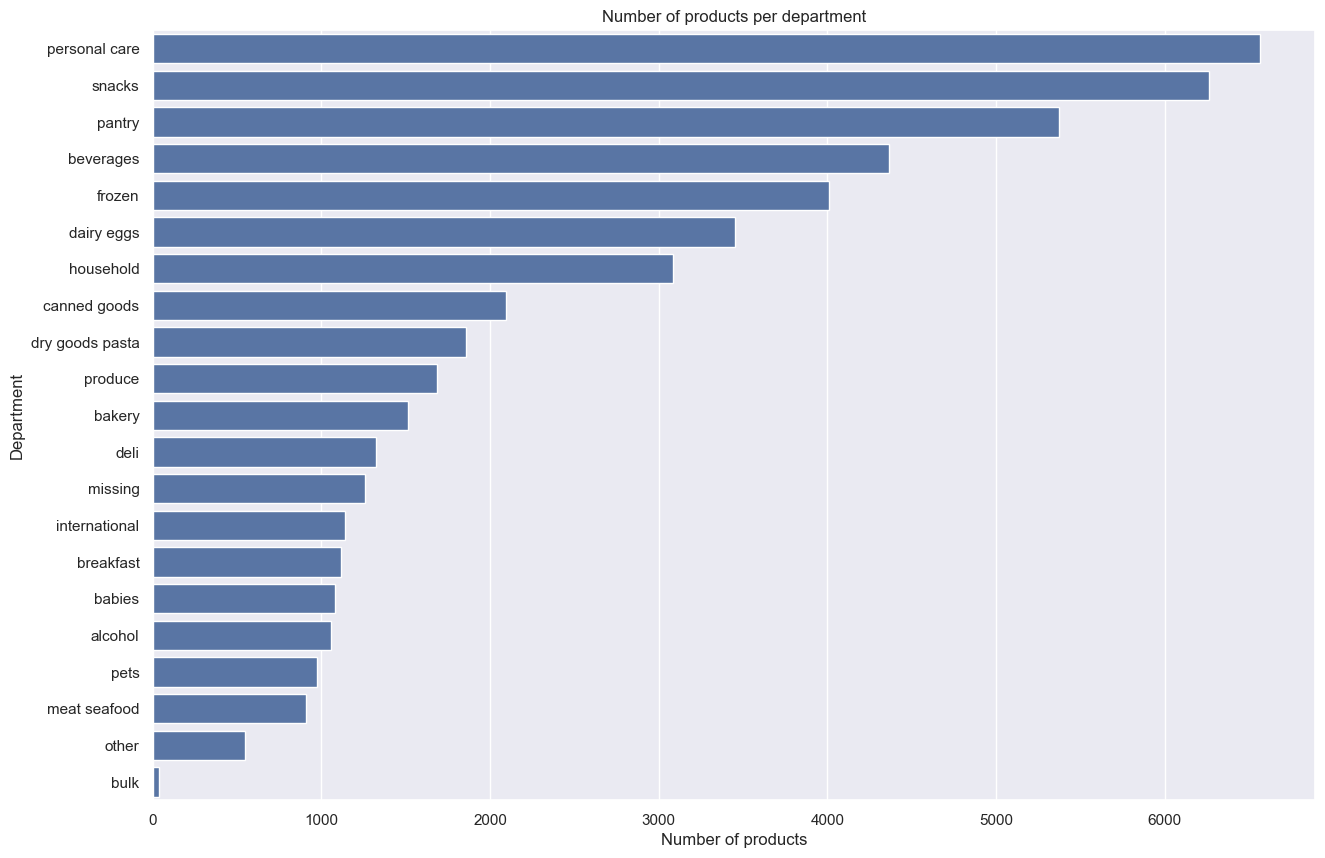

In [9]:
pd_products = products.to_pandas()

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(y="department", data=pd_products, order=pd_products['department'].value_counts().index)
ax.set_title("Number of products per department")
ax.set_xlabel("Number of products")
ax.set_ylabel("Department")
plt.show()

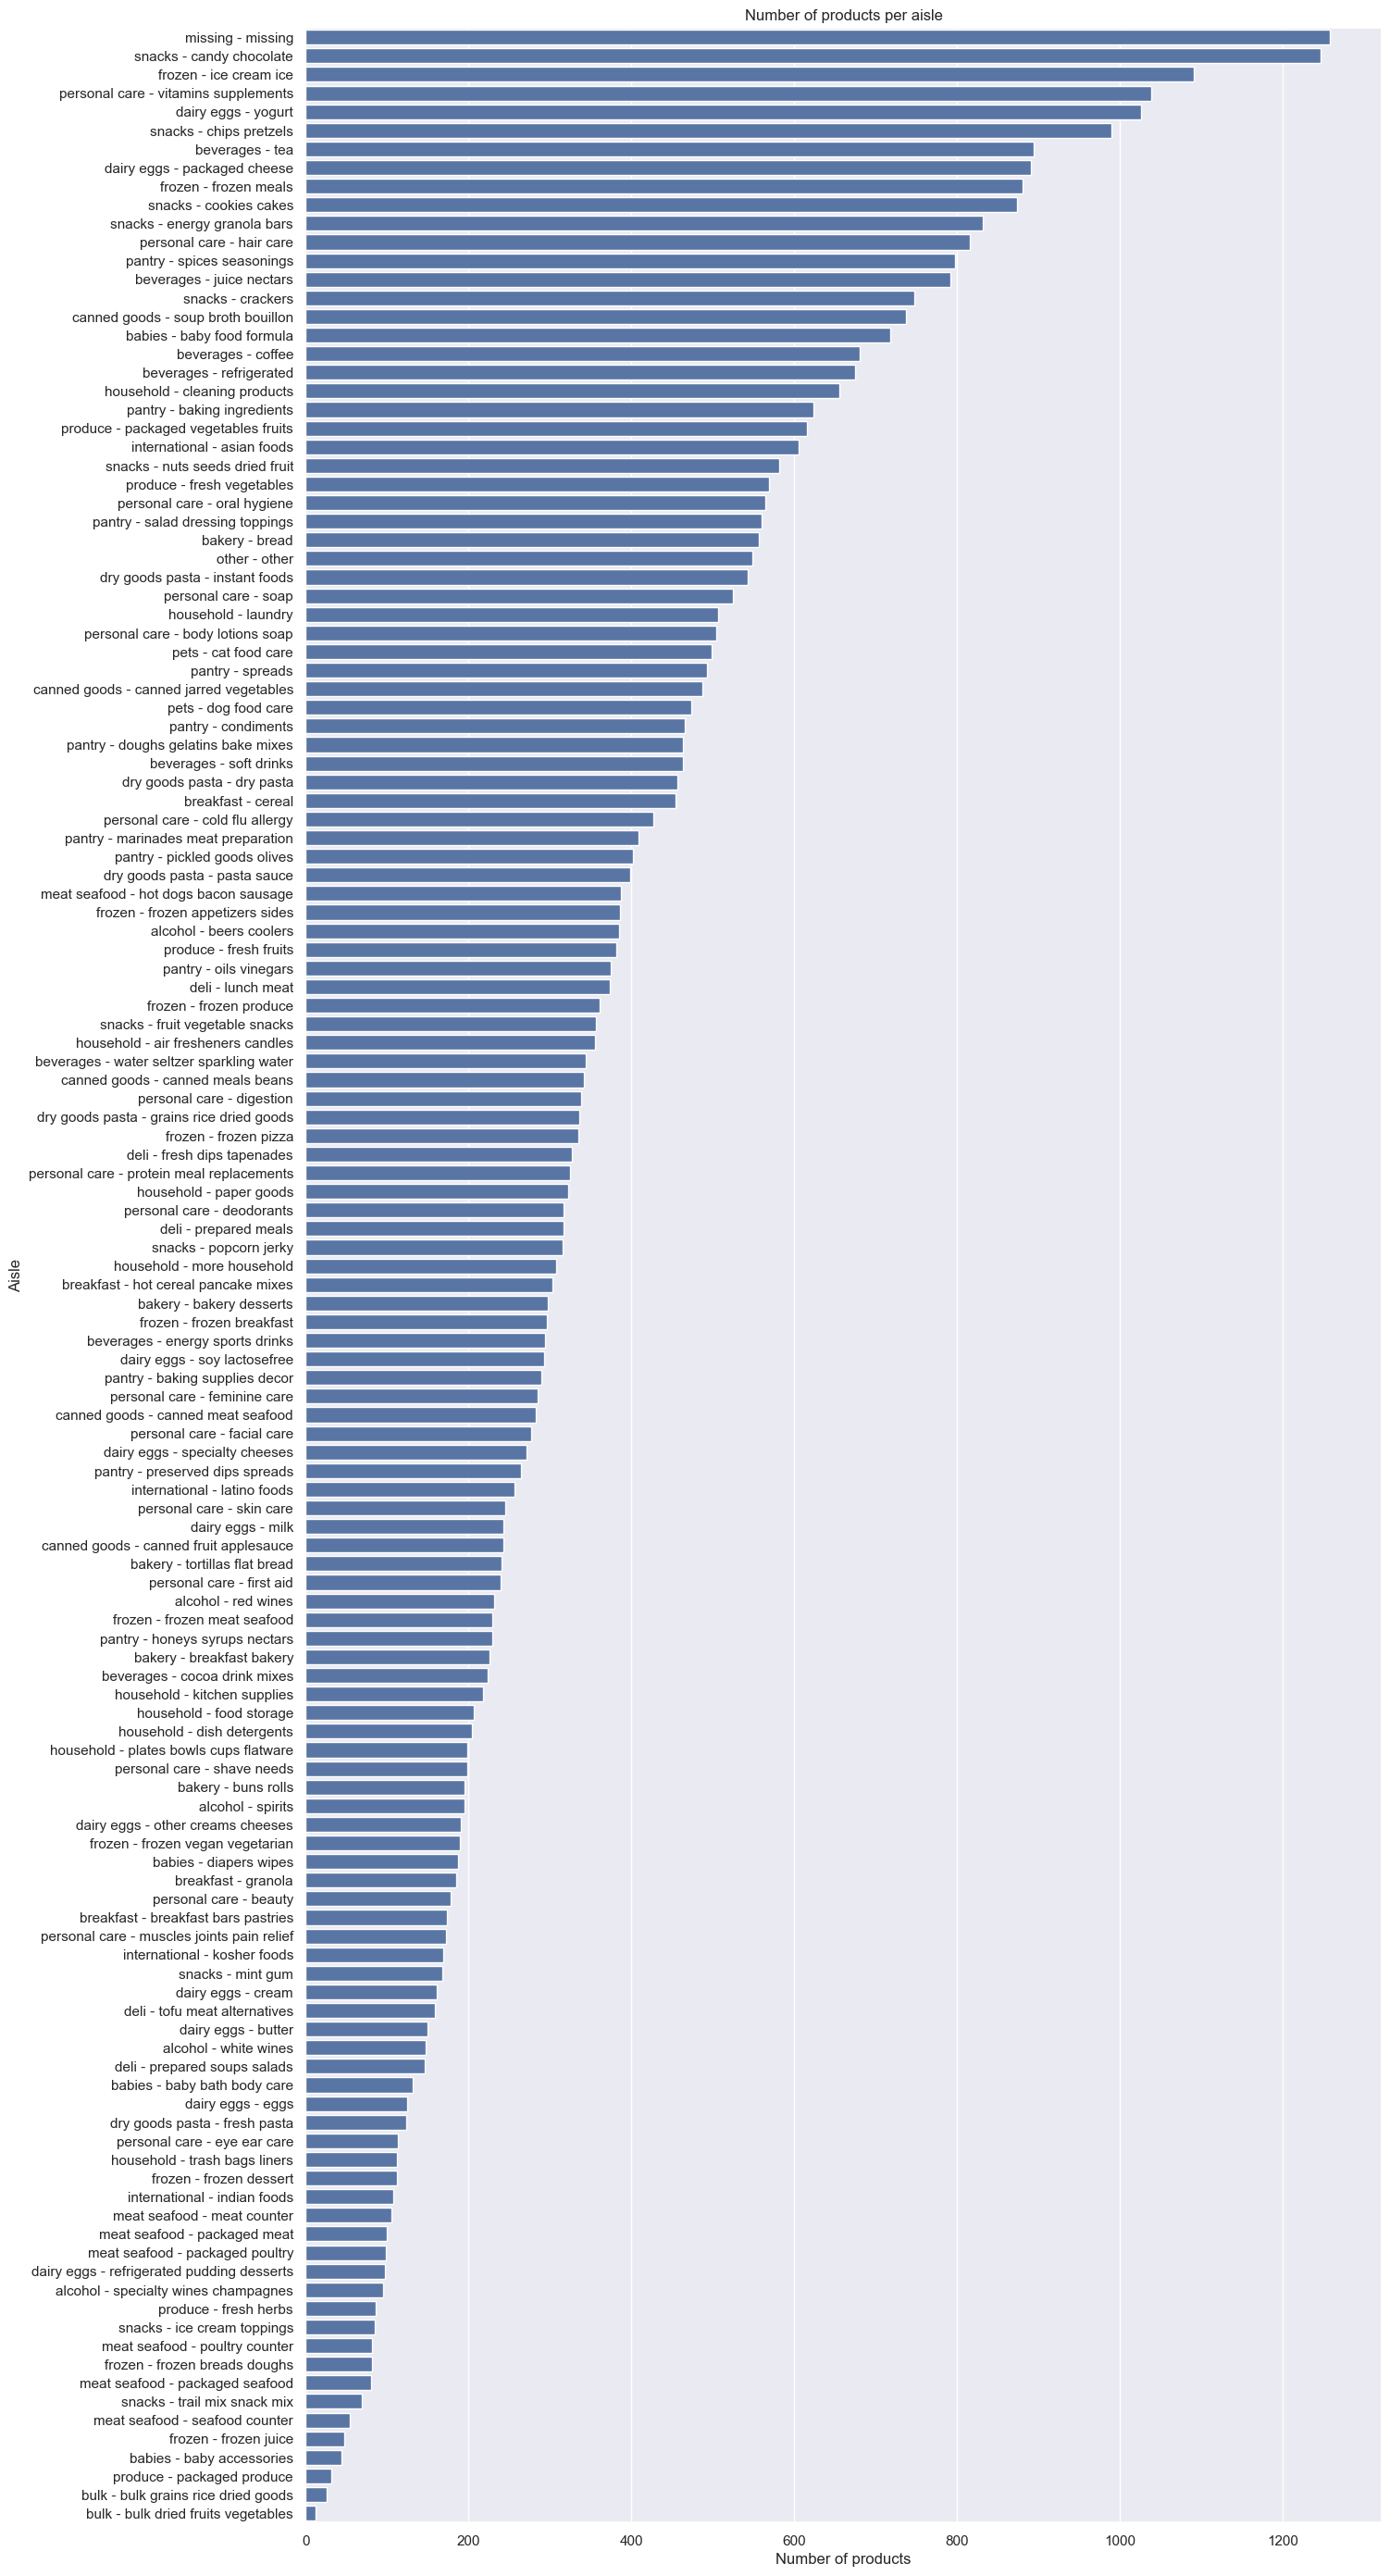

In [10]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,35)})
ax = sns.countplot(y="department_aisle", data=pd_products, order=pd_products['department_aisle'].value_counts().index)
ax.set_title("Number of products per aisle")
ax.set_xlabel("Number of products")
ax.set_ylabel("Aisle")

plt.show()

In [11]:
pd_products = 0

In [12]:
# products without department or aisle
qt_missing = products.filter(pl.col('aisle') == 'missing').group_by('department').agg(pl.count('product_id').alias('count'))['count'].sum()
qt_total = len(products)
print(f"Products without department or aisle: {qt_missing} ({qt_missing/qt_total*100:.2f}%)")

Products without department or aisle: 1258 (2.53%)


### ⚠️ Atention

> It is not so serious, but we noted in the last graph the existence of 1,258 products without info about department or aisle. </br>
> The question is, are they representative in sales volume? We will check that in Orders session.


## 1.2 - Orders

### 1.2.1 - Orders data

- order_id: Uniquely identifies each order.
- user_id: Identifies the customer associated with the order.
- eval_set: Denotes the category to which this order belongs (refer to the SET descriptions below).
- order_number: Represents the sequence number of the order for a user, where 1 denotes the first order and 'n' indicates the nth order.
- order_dow: Indicates the day of the week when the order was placed.
- order_hour_of_day: Specifies the hour at which the order was initiated.
- days_since_prior: Records the number of days that have elapsed since the user's previous order, capped at 30 days (with 'NAs' for the first order).


In [13]:
def day_of_week(day):
    if day == 0:
        return "Sunday"
    elif day == 1:
        return "Monday"
    elif day == 2:
        return "Tuesday"
    elif day == 3:
        return "Wednesday"
    elif day == 4:
        return "Thursday"
    elif day == 5:
        return "Friday"
    elif day == 6:
        return "Saturday"
    else:
        return "Unknown"

In [14]:
orders = (pl.read_csv("data_input/orders.csv", infer_schema_length=1000)
          .with_columns(pl.col("days_since_prior_order").cast(pl.Int32).alias("days_since_prior_order"))
          .with_columns(pl.col("order_dow").map_elements(day_of_week).alias("day_of_week"))
)

orders.describe()

shape: (9, 9)
┌────────────┬───────────────┬───────────────┬──────────┬───┬────────────┬───────────────────┬────────────────────────┬─────────────┐
│ describe   ┆ order_id      ┆ user_id       ┆ eval_set ┆ … ┆ order_dow  ┆ order_hour_of_day ┆ days_since_prior_order ┆ day_of_week │
│ ---        ┆ ---           ┆ ---           ┆ ---      ┆   ┆ ---        ┆ ---               ┆ ---                    ┆ ---         │
│ str        ┆ f64           ┆ f64           ┆ str      ┆   ┆ f64        ┆ f64               ┆ f64                    ┆ str         │
╞════════════╪═══════════════╪═══════════════╪══════════╪═══╪════════════╪═══════════════════╪════════════════════════╪═════════════╡
│ count      ┆ 3.421083e6    ┆ 3.421083e6    ┆ 3421083  ┆ … ┆ 3.421083e6 ┆ 3.421083e6        ┆ 3.214874e6             ┆ 3421083     │
│ null_count ┆ 0.0           ┆ 0.0           ┆ 0        ┆ … ┆ 0.0        ┆ 0.0               ┆ 206209.0               ┆ 0           │
│ mean       ┆ 1.710542e6    ┆ 102978.208059 ┆ null     ┆ … ┆ 2.776219   ┆ 13.452015         ┆ 11.114836              ┆ null        │
│ std        ┆ 987581.739823 ┆ 59533.717794  ┆ null     ┆ … ┆ 2.046829   ┆ 4.226088          ┆ 9.206737               ┆ null        │
│ min        ┆ 1.0           ┆ 1.0           ┆ prior    ┆ … ┆ 0.0        ┆ 0.0               ┆ 0.0                    ┆ Friday      │
│ 25%        ┆ 855272.0      ┆ 51394.0       ┆ null     ┆ … ┆ 1.0        ┆ 10.0              ┆ 4.0                    ┆ null        │
│ 50%        ┆ 1.710542e6    ┆ 102689.0      ┆ null     ┆ … ┆ 3.0        ┆ 13.0              ┆ 7.0                    ┆ null        │
│ 75%        ┆ 2.565813e6    ┆ 154385.0      ┆ null     ┆ … ┆ 5.0        ┆ 16.0              ┆ 15.0                   ┆ null        │
│ max        ┆ 3.421083e6    ┆ 206209.0      ┆ train    ┆ … ┆ 6.0        ┆ 23.0              ┆ 30.0                   ┆ Wednesday   │
└────────────┴───────────────┴───────────────┴──────────┴───┴────────────┴───────────────────┴────────────────────────┴─────────────┘

In [15]:
orders.head(5)

shape: (5, 8)
┌──────────┬─────────┬──────────┬──────────────┬───────────┬───────────────────┬────────────────────────┬─────────────┐
│ order_id ┆ user_id ┆ eval_set ┆ order_number ┆ order_dow ┆ order_hour_of_day ┆ days_since_prior_order ┆ day_of_week │
│ ---      ┆ ---     ┆ ---      ┆ ---          ┆ ---       ┆ ---               ┆ ---                    ┆ ---         │
│ i64      ┆ i64     ┆ str      ┆ i64          ┆ i64       ┆ i64               ┆ i32                    ┆ str         │
╞══════════╪═════════╪══════════╪══════════════╪═══════════╪═══════════════════╪════════════════════════╪═════════════╡
│ 2539329  ┆ 1       ┆ prior    ┆ 1            ┆ 2         ┆ 8                 ┆ null                   ┆ Tuesday     │
│ 2398795  ┆ 1       ┆ prior    ┆ 2            ┆ 3         ┆ 7                 ┆ 15                     ┆ Wednesday   │
│ 473747   ┆ 1       ┆ prior    ┆ 3            ┆ 3         ┆ 12                ┆ 21                     ┆ Wednesday   │
│ 2254736  ┆ 1       ┆ prior    ┆ 4            ┆ 4         ┆ 7                 ┆ 29                     ┆ Thursday    │
│ 431534   ┆ 1       ┆ prior    ┆ 5            ┆ 4         ┆ 15                ┆ 28                     ┆ Thursday    │
└──────────┴─────────┴──────────┴──────────────┴───────────┴───────────────────┴────────────────────────┴─────────────┘

In [16]:
# qtd orders by eval_set
orders.group_by("eval_set").agg(pl.count("order_id").alias("qtd_orders"))

shape: (3, 2)
┌──────────┬────────────┐
│ eval_set ┆ qtd_orders │
│ ---      ┆ ---        │
│ str      ┆ u32        │
╞══════════╪════════════╡
│ train    ┆ 131209     │
│ prior    ┆ 3214874    │
│ test     ┆ 75000      │
└──────────┴────────────┘

In [17]:
# qty orders
len(orders)

3421083

### 😕 Problems
> Oops! Do the orders not have dates, only the day of the week? This is not good, especially for question 2 about inventory management.

> Let's check if it's possible to at least reconstruct a sequence of weeks and count the number of weeks available in the dataset.

### 🧑‍💻 Strategy

This data appears to be from one year, and we have 3.4 million orders, which is approximately 9.3k orders per day.

The order_id column is sequential, and it's expected that there are ~9k orders starting on one day of the week, then another ~9k on a different day, and so on.

If this assumption is correct, then the first lines from the dataset will be from only one day of the week.

In [18]:
# let´s check:
orders.select(pl.col(["order_id","day_of_week"])).sort('order_id').head(30)

shape: (30, 2)
┌──────────┬─────────────┐
│ order_id ┆ day_of_week │
│ ---      ┆ ---         │
│ i64      ┆ str         │
╞══════════╪═════════════╡
│ 1        ┆ Thursday    │
│ 2        ┆ Friday      │
│ 3        ┆ Friday      │
│ 4        ┆ Monday      │
│ 5        ┆ Saturday    │
│ 6        ┆ Monday      │
│ 7        ┆ Tuesday     │
│ 8        ┆ Thursday    │
│ 9        ┆ Sunday      │
│ 10       ┆ Saturday    │
│ …        ┆ …           │
│ 21       ┆ Tuesday     │
│ 22       ┆ Monday      │
│ 23       ┆ Monday      │
│ 24       ┆ Sunday      │
│ 25       ┆ Saturday    │
│ 26       ┆ Sunday      │
│ 27       ┆ Saturday    │
│ 28       ┆ Wednesday   │
│ 29       ┆ Friday      │
│ 30       ┆ Wednesday   │
└──────────┴─────────────┘

### 🙄 No!
> Probably, the dataset contains synthetic data, and the 'order_dow' values were randomly assigned.

> I'll run a statistical test to determine whether the 'order_dow' column sequence is truly random or follows a specific pattern.
- H0: The sequence of day_of_week values in the dataset is random.
- H1: The sequence of day_of_week values in the dataset is not random.


In [19]:
# let´s check for randomness of column order_dow (day of week)
from scipy.stats import median_test
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp

pd_orders = orders.sort('order_id').to_pandas()[['order_dow']]

# Converting the 'order_dow' values to binary (above or below median)
median_value = pd_orders['order_dow'].median()
pd_orders['binary'] = np.where(pd_orders['order_dow'] > median_value, 1, 0)

# Runs Test
test_stat, p_value = runstest_1samp(pd_orders['binary'], correction=False)

print(f"Runs Test Statistic: {test_stat}, P-value: {p_value}")

pd_orders = 0

Runs Test Statistic: 0.5155409426850697, P-value: 0.606175066894491


### 🕵️ p-value > 0.05
> The results show that we can't reject the null hypothesis; therefore, the sequence of days of the week appears to be random, assuming that the 'order_id' reflects the chronological sequence of orders.

> This suggests that we can't use this data to establish a timely sequence of orders or to calculate weekly numbers (such as Week 1, Week 2, etc.)."

### 1.2.2 -  Number of orders per day of the week

The sequence is random, but the distribution across days of the week is not.

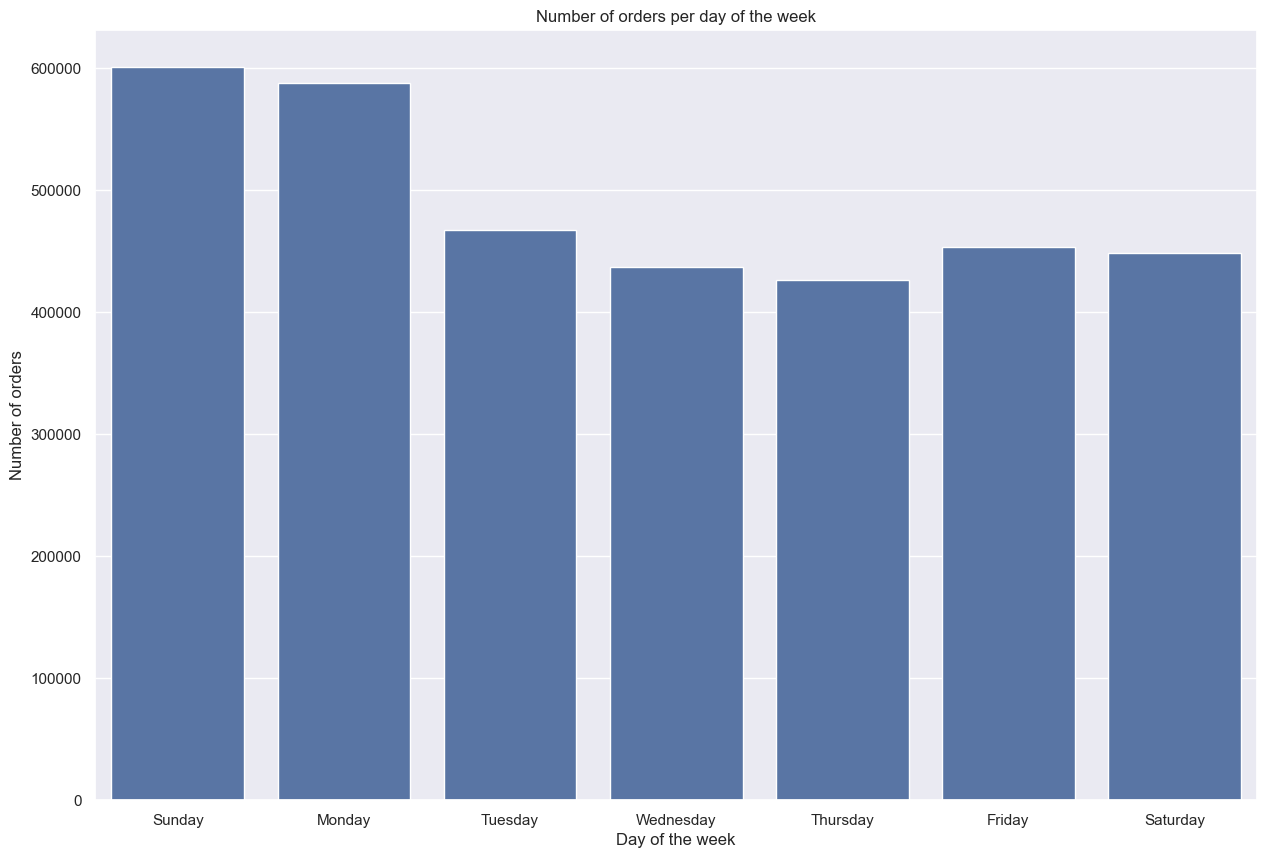

In [20]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(x="day_of_week", data=orders.to_pandas(), order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
ax.set_title("Number of orders per day of the week")
ax.set_xlabel("Day of the week")
ax.set_ylabel("Number of orders")
plt.show()

### 💡
> Sunday and Monday as the days with the most orders.

### 1.2.3 - Number of orders per hour of the day
And considering the time of the day, what are hours with more orders?

Text(0.5, 1.0, 'Number of orders per hour of the day')

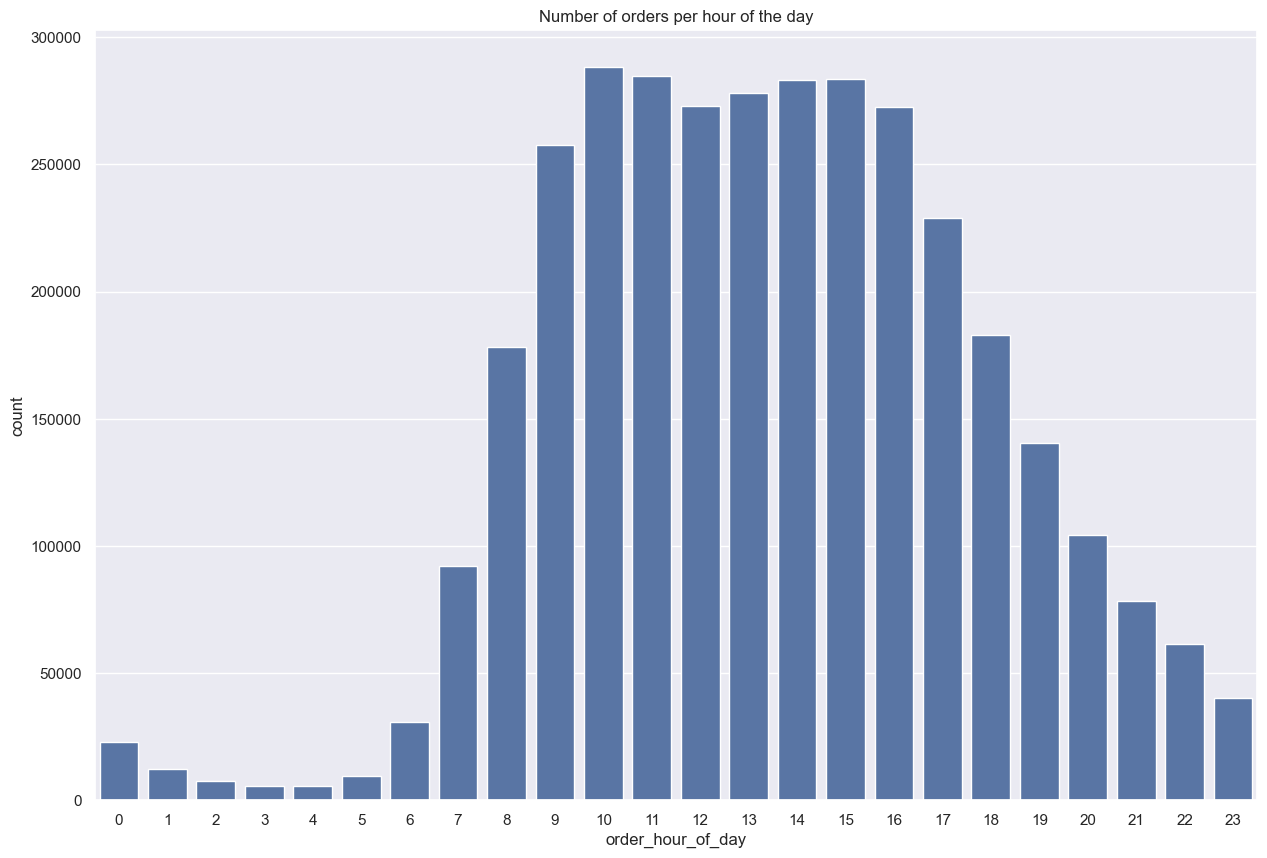

In [21]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(x="order_hour_of_day", data=orders.to_pandas())
ax.set_title("Number of orders per hour of the day")

### 🕵️ Is it possible to have an integrated view of day of week and hour?

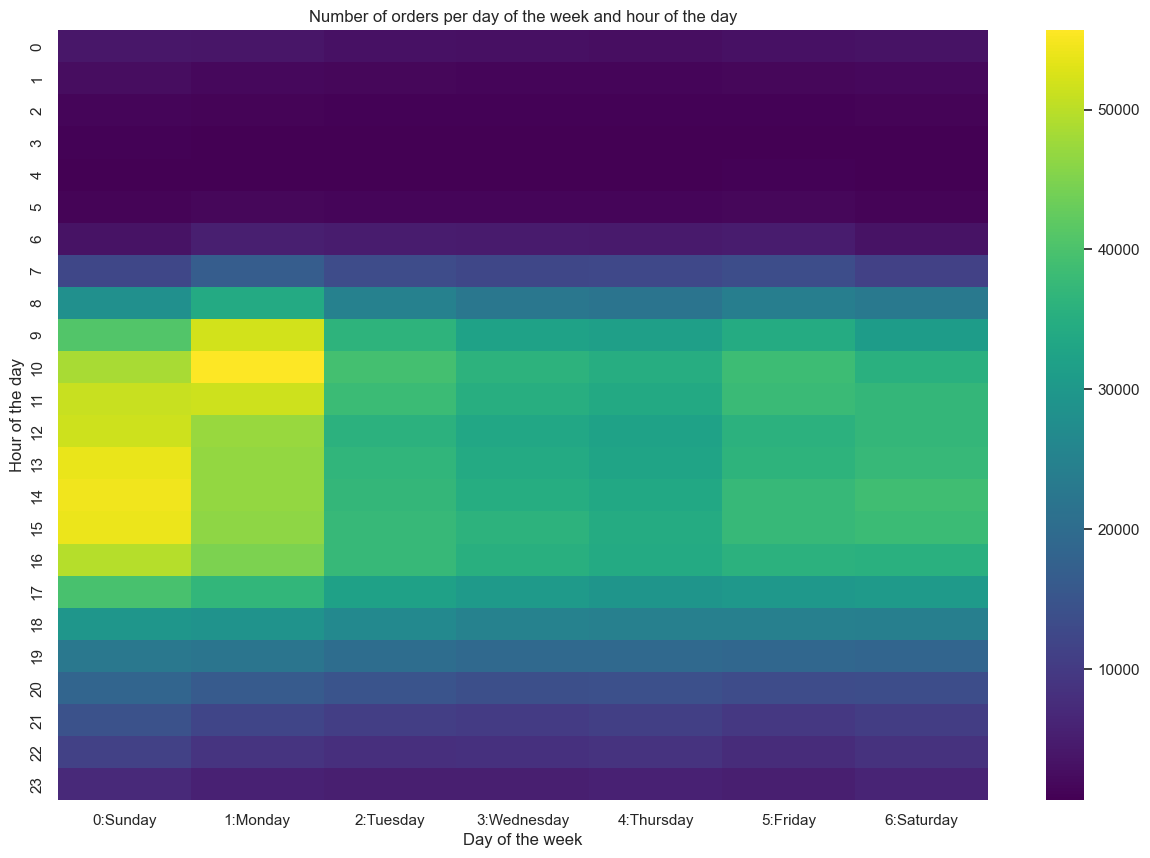

In [22]:
pd_orders = orders.to_pandas()
pd_orders['day_of_week'] = pd_orders['order_dow'].astype(str) + ':' + pd_orders['day_of_week']

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.heatmap(pd_orders.pivot_table(index="order_hour_of_day", columns="day_of_week", values="order_id", aggfunc="count"), cmap="viridis", annot=False, cbar=True)
ax.set_title("Number of orders per day of the week and hour of the day")
ax.set_xlabel("Day of the week")
ax.set_ylabel("Hour of the day")
plt.show()

### 💡
> Here we see more clearly the busiest hours of the store.
> Sunday, after lunch, and Monday, before lunch.

### 🕵️ What are they buying on Sunday and Monday? 
The observed pattern might correlate with specific consumption behaviors. Let's investigate this further.

In [23]:
# we will work more on this dataset later, but we will load it now for this analysis
products_prior = (pl.read_csv("data_input/order_products__prior.csv")
                  .with_columns(pl.col("product_id").cast(pl.Int32))
)

orders_products = (orders
                   .join(products_prior, on="order_id")
                   .join(products, on="product_id")
                   .select(pl.col(["order_id","user_id","order_hour_of_day","day_of_week","product_id","department","aisle"]))
)

# convert to pandas to use seaborn and do some transformations
dp_op = orders_products.to_pandas()

# an auxiliar function to convert day of week to number
def day_of_week_number(day):
    if day == "Sunday":
        return 1
    elif day == "Monday":
        return 2
    elif day == "Tuesday":
        return 3
    elif day == "Wednesday":
        return 4
    elif day == "Thursday":
        return 5
    elif day == "Friday":
        return 6
    elif day == "Saturday":
        return 7
    else:
        return "Unknown"


# to make the heatmap more readable I will consider only the top 10 products per day of week and only the products that are above of expected mean for each week day (~14%)
# also we will group items by aisle
# adjusts here could include more or less products, but I think this is a good balance
aisle_day = dp_op.groupby(['aisle','day_of_week']).size().reset_index(name='count')
aisle_day['total_items'] = aisle_day.groupby(['aisle'])['count'].transform('sum')
aisle_day['percentage'] = aisle_day['count'] / aisle_day['total_items']
aisle_day = aisle_day.sort_values(['day_of_week','percentage','aisle'], ascending=[True, False, True])
aisle_day = aisle_day[aisle_day['percentage'] > 0.15]
aisle_day = aisle_day.groupby('day_of_week').head(10)
aisle_day['day_of_week_number'] = aisle_day['day_of_week'].map(day_of_week_number)
aisle_day['day_of_week'] = aisle_day['day_of_week_number'].astype(str) + ':' + aisle_day['day_of_week']
aisle_day = aisle_day[['aisle','day_of_week','percentage']]
aisle_day.head(3)

aisle day_of_week  percentage
63                beers coolers    6:Friday    0.194402
861                     spirits    6:Friday    0.186037
847  specialty wines champagnes    6:Friday    0.175121

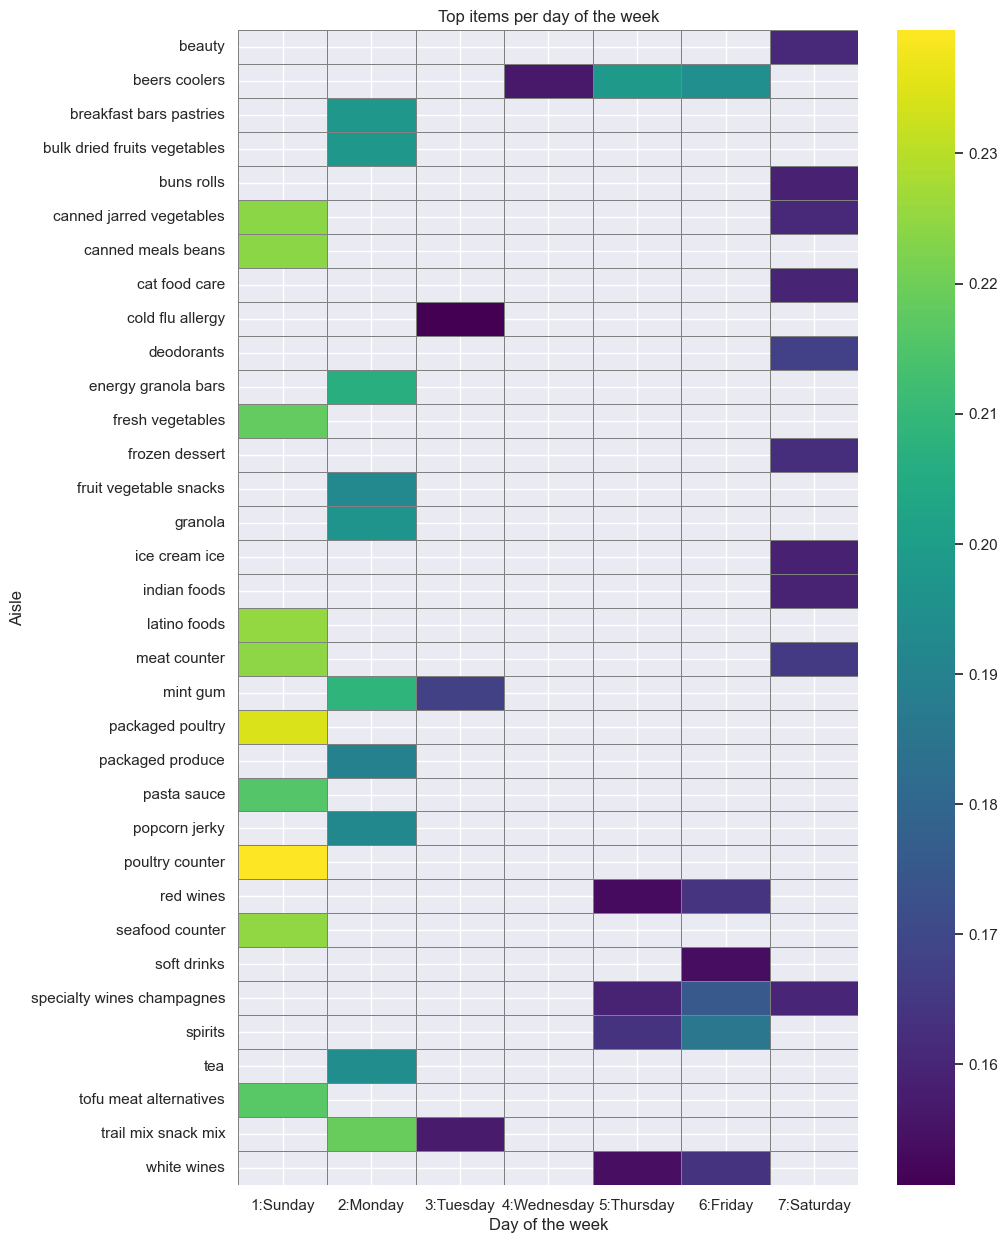

In [24]:
# I will use a heatmap to better visualize a matrix of aisles x day of week
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,15)})
ax = sns.heatmap(aisle_day.pivot_table(index="aisle", columns="day_of_week", values="percentage", aggfunc="sum"), cmap="viridis", annot=False, cbar=True,square=False,linewidths=.5,linecolor='gray')
ax.set_title("Top items per day of the week")
ax.set_xlabel("Day of the week")
ax.set_ylabel("Aisle")
plt.show()

### 💡 Wow! It's possible to identify some general behavior patterns

> Especially after 12 PM on Sunday, the most commonly ordered items are those used for meal preparation, suggesting that people likely use their free time on Sunday to cook! 🍲🥗🍝

> On Monday morning, customers typically replenish their breakfast items and snacks for the week. 🥞🍵

> Thursdays and Fridays see customers preparing for the weekend by stocking up on beer, wine, spirits, and soft drinks. 🍺🍷🍸

> Saturdays are for self-care, with an uptick in the purchase of beauty products and deodorants, as well as indulgent treats like desserts and ice cream. 💄🍨🥩

### 🪄 Recommendations

> Given that certain product categories see increased demand on specific days of the week, it's feasible to plan ahead to better meet order fulfillment.

> The trade-marketing team could organize promotional activities tailored to these peak days, or rearrange the end caps of aisles to highlight products in line with the day’s demand. Examples:
- Offering kits or recipe books on Sundays, promoting healthy foods on Mondays, and conducting beauty demonstrations on Saturdays.
- Deploying extra staff for wine consultations, and using special point-of-sale displays for beers on Thursdays and Fridays."


### 🪄 The best day to launch this new end cap of the aisle is Thursday!
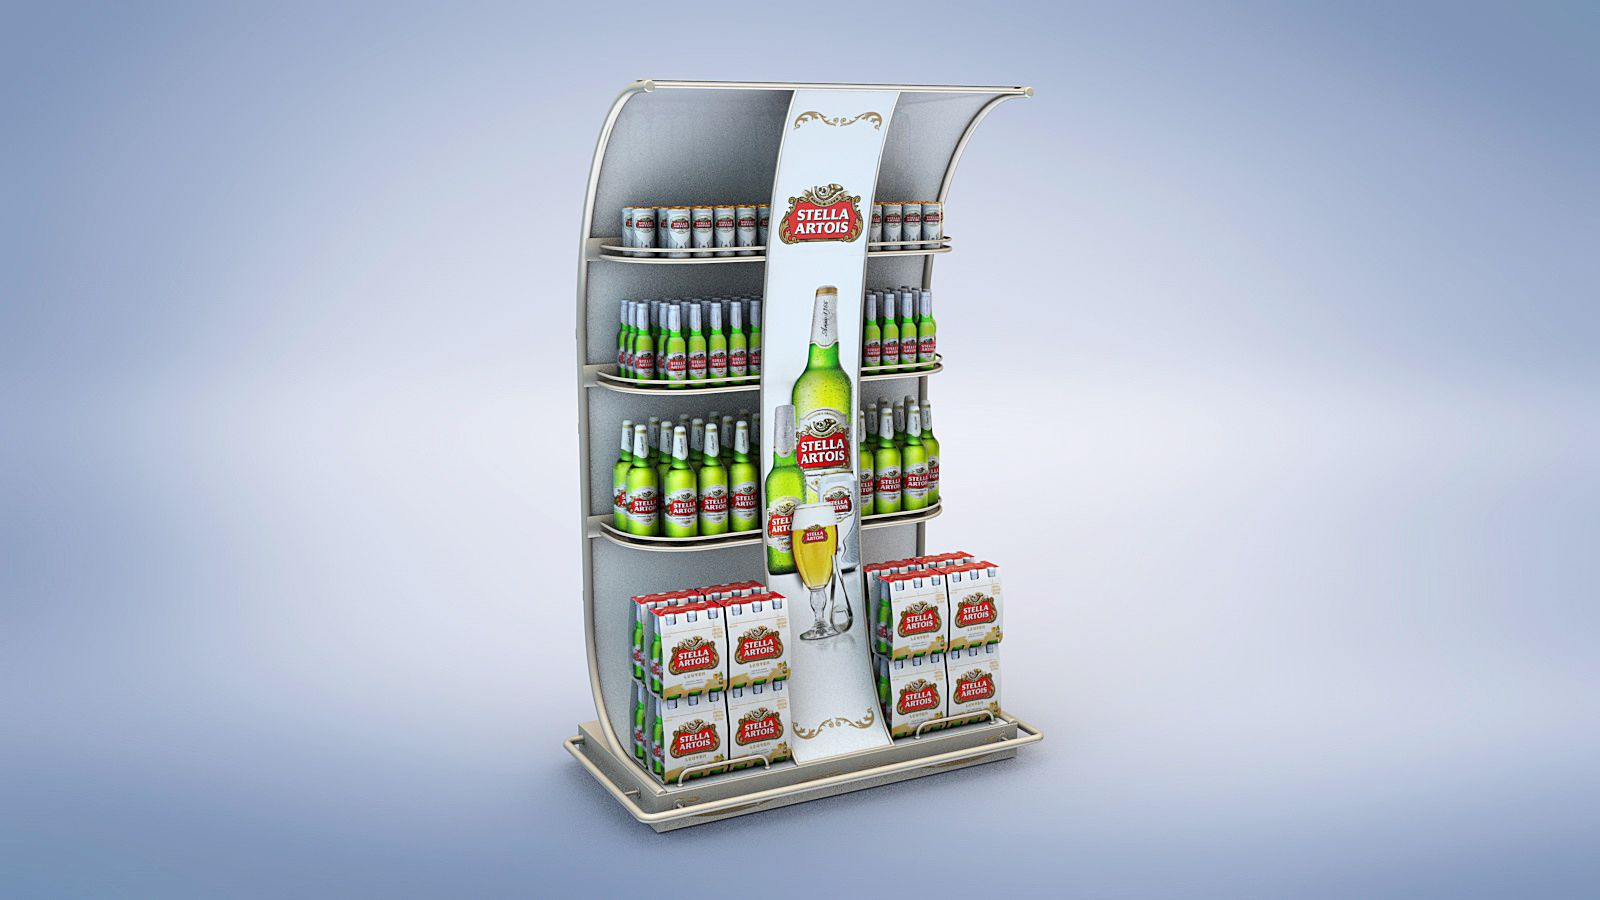

### 1.2.4 - Products per order (prior dataset)

- order_id: Serves as a foreign key, linking to the unique order identifier.
- product_id: Functions as a foreign key, connecting to the unique product identifier.
- add_to_cart_order: Reflects the order in which each product was added to the shopping cart.
- reordered: Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not. 


In [25]:
products_prior = (pl.read_csv("data_input/order_products__prior.csv")
                  .with_columns(pl.col("product_id").cast(pl.Int32))
)

products_prior.describe()

shape: (9, 5)
┌────────────┬───────────────┬──────────────┬───────────────────┬─────────────┐
│ describe   ┆ order_id      ┆ product_id   ┆ add_to_cart_order ┆ reordered   │
│ ---        ┆ ---           ┆ ---          ┆ ---               ┆ ---         │
│ str        ┆ f64           ┆ f64          ┆ f64               ┆ f64         │
╞════════════╪═══════════════╪══════════════╪═══════════════════╪═════════════╡
│ count      ┆ 3.2434489e7   ┆ 3.2434489e7  ┆ 3.2434489e7       ┆ 3.2434489e7 │
│ null_count ┆ 0.0           ┆ 0.0          ┆ 0.0               ┆ 0.0         │
│ mean       ┆ 1.7107e6      ┆ 25576.337535 ┆ 8.351076          ┆ 0.589697    │
│ std        ┆ 987300.696453 ┆ 14096.68909  ┆ 7.126671          ┆ 0.491889    │
│ min        ┆ 2.0           ┆ 1.0          ┆ 1.0               ┆ 0.0         │
│ 25%        ┆ 855943.0      ┆ 13530.0      ┆ 3.0               ┆ 0.0         │
│ 50%        ┆ 1.711048e6    ┆ 25256.0      ┆ 6.0               ┆ 1.0         │
│ 75%        ┆ 2.565514e6    ┆ 37935.0      ┆ 11.0              ┆ 1.0         │
│ max        ┆ 3.421083e6    ┆ 49688.0      ┆ 145.0             ┆ 1.0         │
└────────────┴───────────────┴──────────────┴───────────────────┴─────────────┘

In [26]:
products_prior.head(10)

shape: (10, 4)
┌──────────┬────────────┬───────────────────┬───────────┐
│ order_id ┆ product_id ┆ add_to_cart_order ┆ reordered │
│ ---      ┆ ---        ┆ ---               ┆ ---       │
│ i64      ┆ i32        ┆ i64               ┆ i64       │
╞══════════╪════════════╪═══════════════════╪═══════════╡
│ 2        ┆ 33120      ┆ 1                 ┆ 1         │
│ 2        ┆ 28985      ┆ 2                 ┆ 1         │
│ 2        ┆ 9327       ┆ 3                 ┆ 0         │
│ 2        ┆ 45918      ┆ 4                 ┆ 1         │
│ 2        ┆ 30035      ┆ 5                 ┆ 0         │
│ 2        ┆ 17794      ┆ 6                 ┆ 1         │
│ 2        ┆ 40141      ┆ 7                 ┆ 1         │
│ 2        ┆ 1819       ┆ 8                 ┆ 1         │
│ 2        ┆ 43668      ┆ 9                 ┆ 0         │
│ 3        ┆ 33754      ┆ 1                 ┆ 1         │
└──────────┴────────────┴───────────────────┴───────────┘

In [27]:
len(products_prior)

32434489

### 🕵️ What is the average of products per order?

In [28]:
print("Mean number of products per order: " + str(products_prior.group_by('order_id').agg(pl.count('product_id').alias('qtd_products')).select(pl.col('qtd_products')).mean()['qtd_products'][0]))

Mean number of products per order: 10.088883421247614


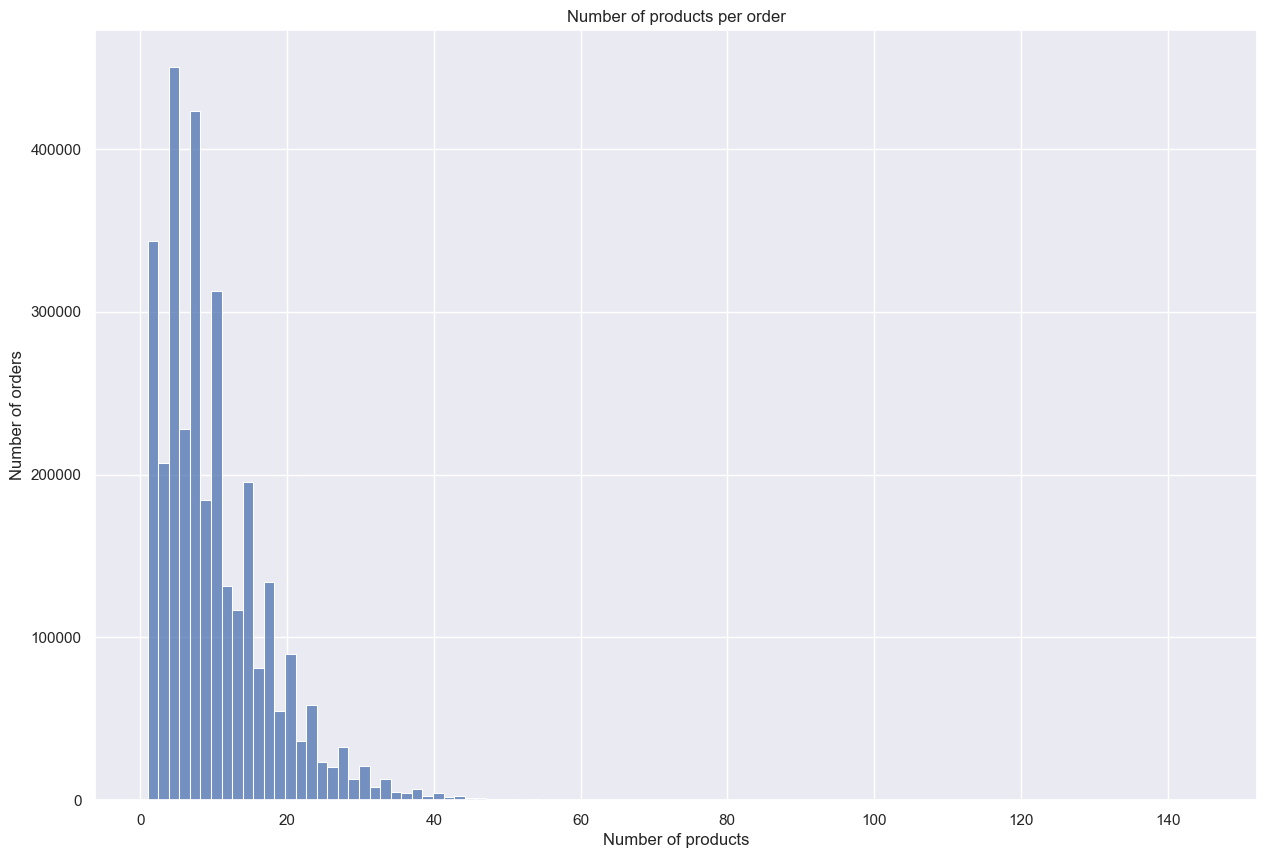

In [29]:
df = products_prior.group_by('order_id').agg(pl.count('product_id').alias('qtd_products')).to_pandas()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.histplot(data=df, x="qtd_products", bins=100)
ax.set_title("Number of products per order")
ax.set_xlabel("Number of products")
ax.set_ylabel("Number of orders")

plt.show()

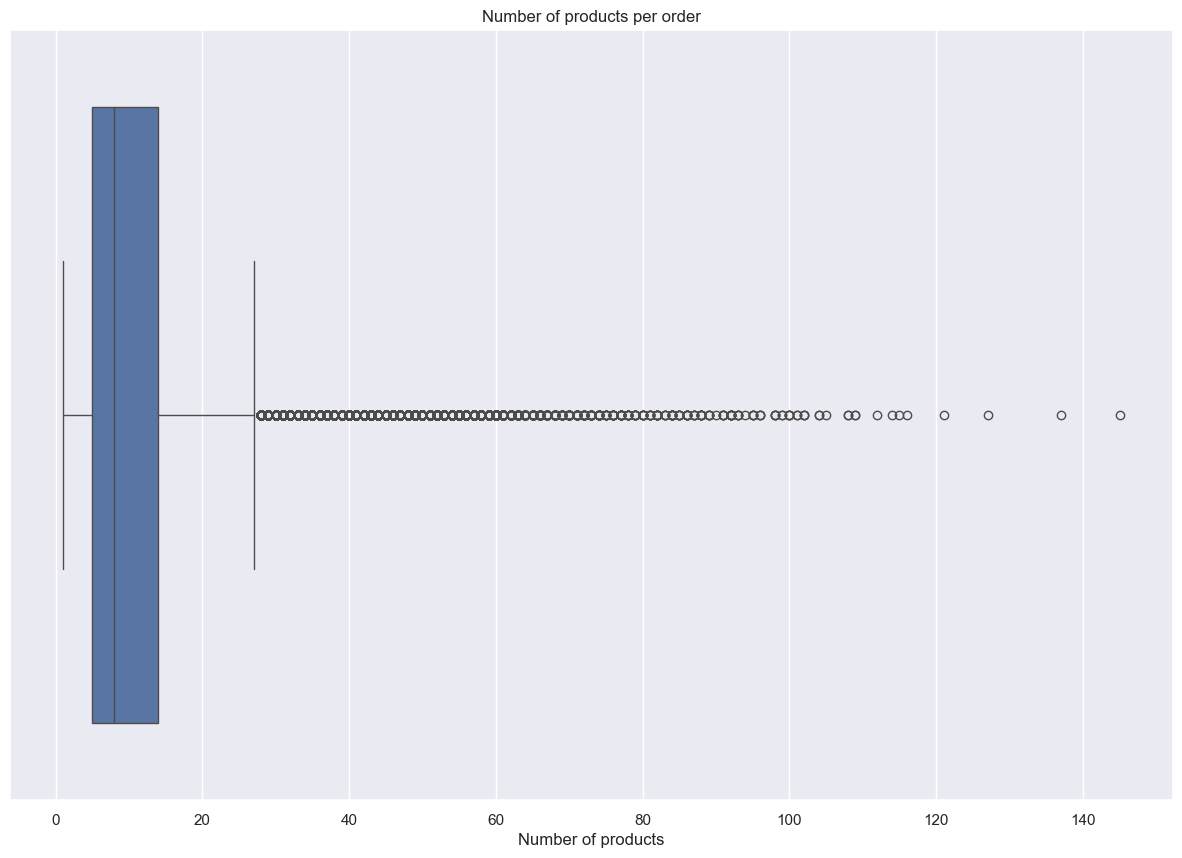

In [31]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.boxplot(x=df["qtd_products"])
ax.set_title("Number of products per order")
ax.set_xlabel("Number of products")
plt.show()

### 💡 Insights

> The majority of orders will have a maximum of 30 items, with an average of ten.

> The store has the number of SKUs typical of a large store, but the buying behavior resembles that of a convenience store 🤔.

### 🕵️‍♂️ More questions for further analysis
- Which products do people normally put first in their baskets?
- Which products are reordered more often (indicating products that are consumed more frequently)?
</br>
</br>

### 🏆

Now that we have a better understanding of our data, and have already gained some initial insights, it's time to continue the analysis with a focus on consumer segmentation.
</br>
</br>

---

# 2 - Customer Segmentation

🎯 Can you segment customers based on their ordering behavior, such as frequency, time of day, or days since prior order, to better understand their preferences and propose ways to optimize marketing strategies?

</br>

### 🧑‍💻 Strategy

In the Data Explorer session, we observed that the only available data for clients is their ID. More data will be necessary for further analysis. 

Our strategy, therefore, is to search for new features related to clients (feature engineering), which could be used to better understand customer behavior. 

The analysis will also provide general insights.

## 2.1 - Orders
Let's start investigating the orders by client.

In [29]:
# preparing an dataset with orders by client
orders_client = (orders
                .group_by("user_id").agg(
                     pl.count("order_id").alias("qtd_orders"),
                     pl.mean("days_since_prior_order").alias("avg_days")
                     )
)

### 2.1.1 - Histogram - Number of orders per client

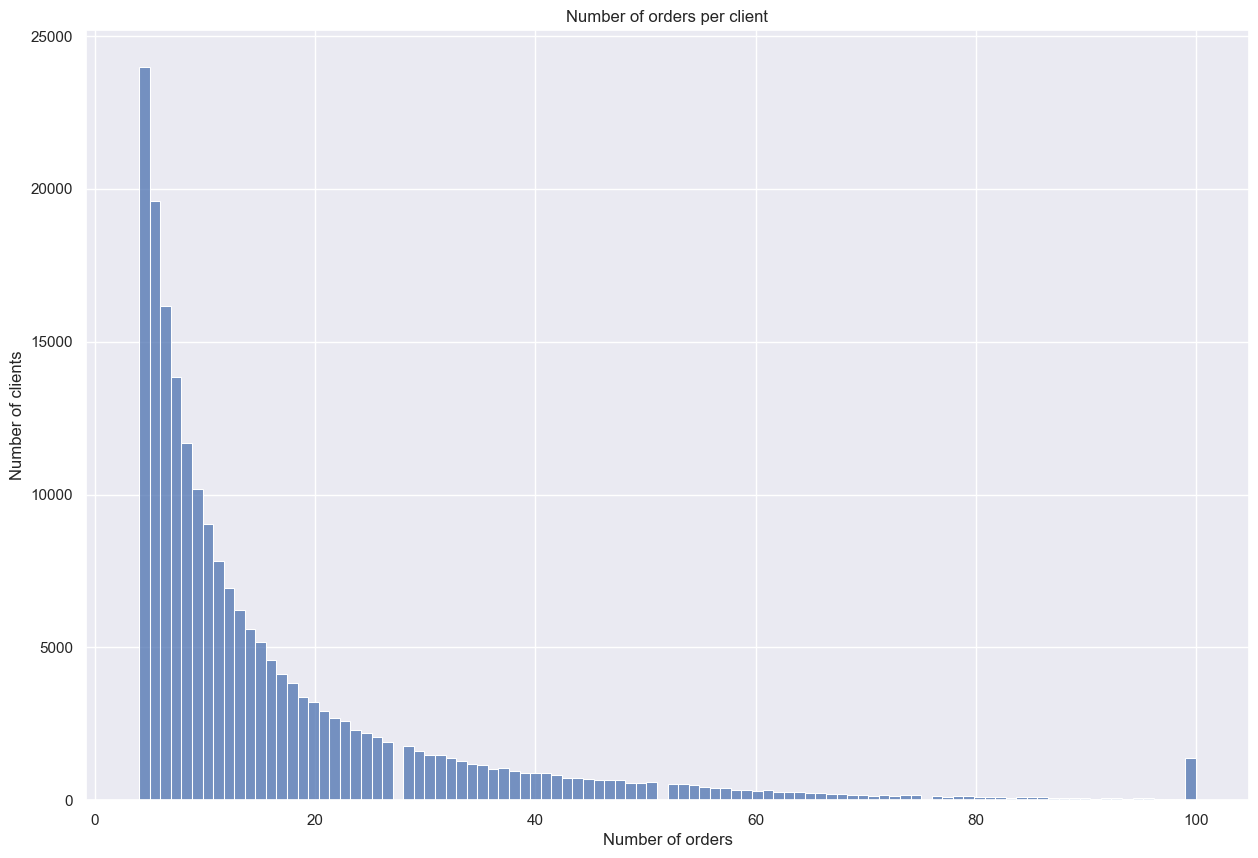

In [30]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.histplot(data=orders_client.to_pandas(), x="qtd_orders", bins=100)
ax.set_title("Number of orders per client")
ax.set_xlabel("Number of orders")
ax.set_ylabel("Number of clients")
plt.show()


### 🤔 Something strange here... why is there a group of 1374 clients with 'exactly' 100 orders?

- Maybe they 'cap' the orders at a maximum of 100?
- Maybe it's because of the synthetic data generation?
- Well, anyway, this anomaly could introduce bias in the models that will be built next.

In [31]:
# I'll investigate the clients with 100 orders
clientes_100 = orders_client.filter(pl.col("qtd_orders") == 100)
clientes_100.head(10)

shape: (10, 3)
┌─────────┬────────────┬──────────┐
│ user_id ┆ qtd_orders ┆ avg_days │
│ ---     ┆ ---        ┆ ---      │
│ i64     ┆ u32        ┆ f64      │
╞═════════╪════════════╪══════════╡
│ 7744    ┆ 100        ┆ 3.616162 │
│ 3960    ┆ 100        ┆ 2.929293 │
│ 164927  ┆ 100        ┆ 3.242424 │
│ 106724  ┆ 100        ┆ 2.79798  │
│ 157704  ┆ 100        ┆ 2.909091 │
│ 81944   ┆ 100        ┆ 2.505051 │
│ 70922   ┆ 100        ┆ 2.616162 │
│ 60716   ┆ 100        ┆ 2.969697 │
│ 65039   ┆ 100        ┆ 3.232323 │
│ 14437   ┆ 100        ┆ 3.121212 │
└─────────┴────────────┴──────────┘

In [32]:
# qty clients with 100 orders
len(clientes_100)

1374

In [33]:
# an example of a client with 100 orders
orders.filter(pl.col("user_id") == 140665)

shape: (100, 8)
┌──────────┬─────────┬──────────┬──────────────┬───────────┬───────────────────┬────────────────────────┬─────────────┐
│ order_id ┆ user_id ┆ eval_set ┆ order_number ┆ order_dow ┆ order_hour_of_day ┆ days_since_prior_order ┆ day_of_week │
│ ---      ┆ ---     ┆ ---      ┆ ---          ┆ ---       ┆ ---               ┆ ---                    ┆ ---         │
│ i64      ┆ i64     ┆ str      ┆ i64          ┆ i64       ┆ i64               ┆ i32                    ┆ str         │
╞══════════╪═════════╪══════════╪══════════════╪═══════════╪═══════════════════╪════════════════════════╪═════════════╡
│ 2245937  ┆ 140665  ┆ prior    ┆ 1            ┆ 2         ┆ 13                ┆ null                   ┆ Tuesday     │
│ 780133   ┆ 140665  ┆ prior    ┆ 2            ┆ 1         ┆ 13                ┆ 6                      ┆ Monday      │
│ 785232   ┆ 140665  ┆ prior    ┆ 3            ┆ 3         ┆ 13                ┆ 2                      ┆ Wednesday   │
│ 1810094  ┆ 140665  ┆ prior    ┆ 4            ┆ 2         ┆ 15                ┆ 6                      ┆ Tuesday     │
│ 110973   ┆ 140665  ┆ prior    ┆ 5            ┆ 5         ┆ 14                ┆ 3                      ┆ Friday      │
│ 634994   ┆ 140665  ┆ prior    ┆ 6            ┆ 4         ┆ 14                ┆ 6                      ┆ Thursday    │
│ 2372608  ┆ 140665  ┆ prior    ┆ 7            ┆ 1         ┆ 14                ┆ 4                      ┆ Monday      │
│ 1529930  ┆ 140665  ┆ prior    ┆ 8            ┆ 5         ┆ 14                ┆ 4                      ┆ Friday      │
│ 468574   ┆ 140665  ┆ prior    ┆ 9            ┆ 0         ┆ 14                ┆ 9                      ┆ Sunday      │
│ 2704506  ┆ 140665  ┆ prior    ┆ 10           ┆ 1         ┆ 16                ┆ 1                      ┆ Monday      │
│ …        ┆ …       ┆ …        ┆ …            ┆ …         ┆ …                 ┆ …                      ┆ …           │
│ 1117213  ┆ 140665  ┆ prior    ┆ 91           ┆ 1         ┆ 12                ┆ 5                      ┆ Monday      │
│ 1039386  ┆ 140665  ┆ prior    ┆ 92           ┆ 2         ┆ 13                ┆ 1                      ┆ Tuesday     │
│ 1616410  ┆ 140665  ┆ prior    ┆ 93           ┆ 5         ┆ 11                ┆ 3                      ┆ Friday      │
│ 526898   ┆ 140665  ┆ prior    ┆ 94           ┆ 0         ┆ 12                ┆ 2                      ┆ Sunday      │
│ 3017814  ┆ 140665  ┆ prior    ┆ 95           ┆ 1         ┆ 10                ┆ 1                      ┆ Monday      │
│ 1247077  ┆ 140665  ┆ prior    ┆ 96           ┆ 5         ┆ 9                 ┆ 4                      ┆ Friday      │
│ 846654   ┆ 140665  ┆ prior    ┆ 97           ┆ 2         ┆ 9                 ┆ 4                      ┆ Tuesday     │
│ 48695    ┆ 140665  ┆ prior    ┆ 98           ┆ 4         ┆ 15                ┆ 2                      ┆ Thursday    │
│ 2589539  ┆ 140665  ┆ prior    ┆ 99           ┆ 6         ┆ 14                ┆ 2                      ┆ Saturday    │
│ 2965470  ┆ 140665  ┆ train    ┆ 100          ┆ 0         ┆ 11                ┆ 1                      ┆ Sunday      │
└──────────┴─────────┴──────────┴──────────────┴───────────┴───────────────────┴────────────────────────┴─────────────┘

### 🤔 Why does every client have at least four orders?

- Where are the clients who have only one or two orders?
- Could it be that this database only includes recurrent clients with more than three orders?"


In [34]:
orders.group_by("user_id").agg(pl.count("order_id").alias("qtd_orders")).sort("qtd_orders").head(3)

shape: (3, 2)
┌─────────┬────────────┐
│ user_id ┆ qtd_orders │
│ ---     ┆ ---        │
│ i64     ┆ u32        │
╞═════════╪════════════╡
│ 176836  ┆ 4          │
│ 176193  ┆ 4          │
│ 31348   ┆ 4          │
└─────────┴────────────┘

### 2.1.2 - Just another histogram, with a different aproach for bins

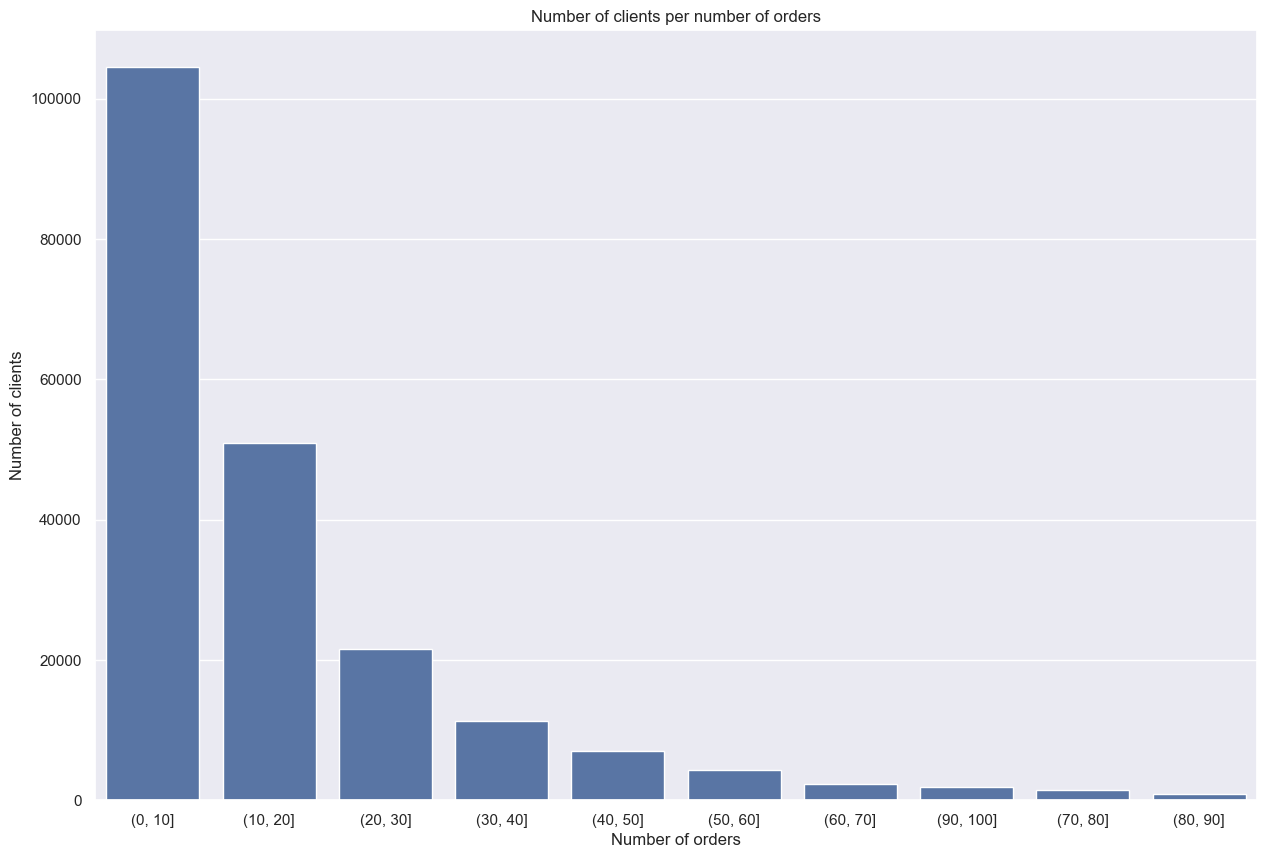

In [35]:
# another histogram, with a different aproach for bins
pd_orders_client = orders_client.to_pandas()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90 ,100]
pd_orders_client['qtd_orders_bins'] = pd.cut(pd_orders_client['qtd_orders'], bins=bins)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(x="qtd_orders_bins", data=pd_orders_client, order=pd_orders_client['qtd_orders_bins'].value_counts().index)
ax.set_title("Number of clients per number of orders")
ax.set_xlabel("Number of orders")
ax.set_ylabel("Number of clients")
plt.show()

### 2.1.3 - Histogram - Avg days between orders

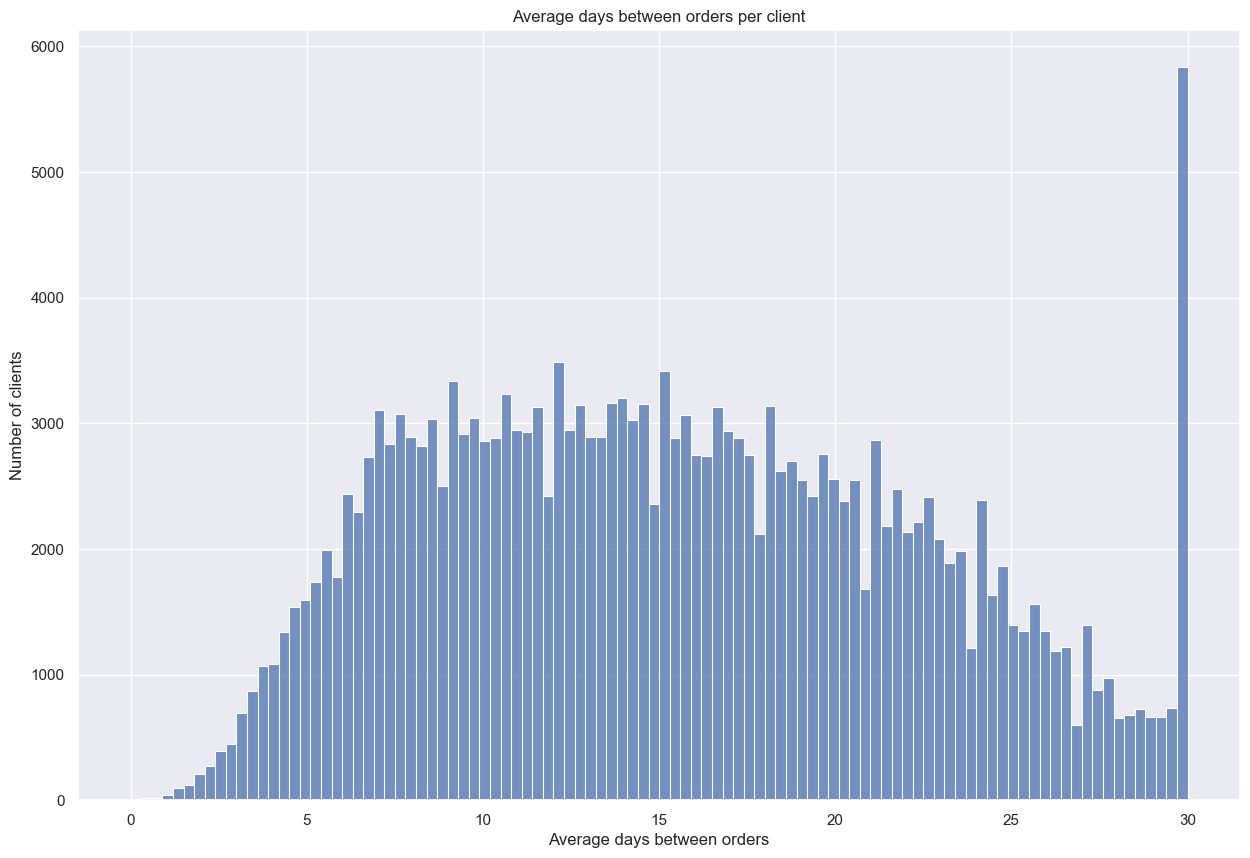

In [36]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.histplot(data=orders_client.to_pandas(), x="avg_days", bins=100)
ax.set_title("Average days between orders per client")
ax.set_xlabel("Average days between orders")
ax.set_ylabel("Number of clients")
plt.show()

In [37]:
len(orders_client.filter(pl.col("avg_days") == 30))

5573

### 👍 Another anomaly has been identified, although this one is expected.

> There are 5,573 clients with exactly 30 days between orders. This occurs because the 'days_since_prior_order' column is capped at 30.

> However, depending on the model, it may be necessary to make adjustments to prevent introducing bias.

### 2.1.4 - Average days between orders

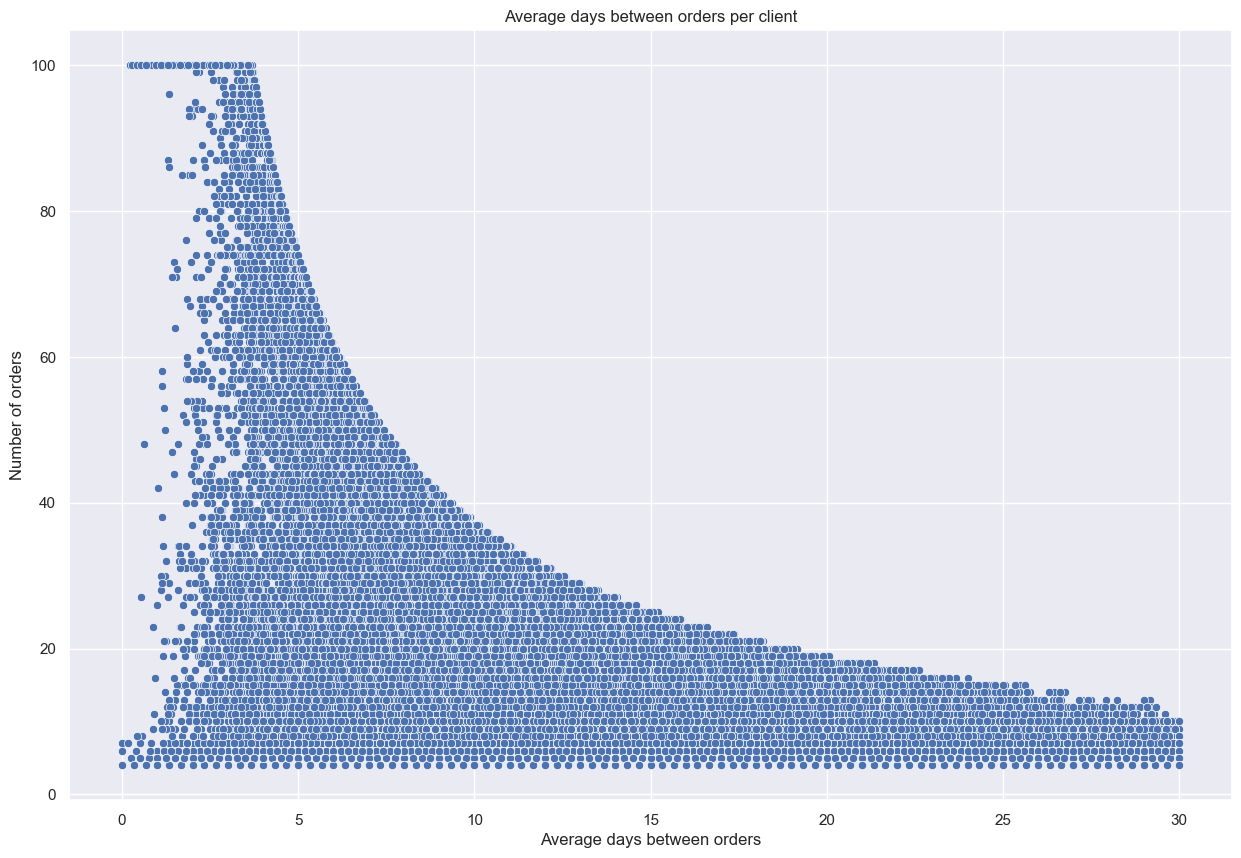

In [38]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.scatterplot(data=orders_client.to_pandas(), x="avg_days", y="qtd_orders")
ax.set_title("Average days between orders per client")
ax.set_xlabel("Average days between orders")
ax.set_ylabel("Number of orders")
plt.show()

### 🕵️ What if?
What if we sum the 'days_since_prior_order' column for each customer? 

This could give us an idea of the total number of days between their first and last order, providing a measure of customer tenure.

In [39]:
orders_client = (orders
                 .group_by(pl.col("user_id"))
                 .agg(
                     pl.count("order_id").alias("qtd_orders"),
                     pl.sum("days_since_prior_order").alias("sum_days"))
                     .with_columns((pl.col("sum_days") / pl.col("qtd_orders")).alias("avg_days"))
)

orders_client.head(3)

shape: (3, 4)
┌─────────┬────────────┬──────────┬──────────┐
│ user_id ┆ qtd_orders ┆ sum_days ┆ avg_days │
│ ---     ┆ ---        ┆ ---      ┆ ---      │
│ i64     ┆ u32        ┆ i32      ┆ f64      │
╞═════════╪════════════╪══════════╪══════════╡
│ 101749  ┆ 4          ┆ 90       ┆ 22.5     │
│ 126103  ┆ 38         ┆ 277      ┆ 7.289474 │
│ 155468  ┆ 57         ┆ 304      ┆ 5.333333 │
└─────────┴────────────┴──────────┴──────────┘

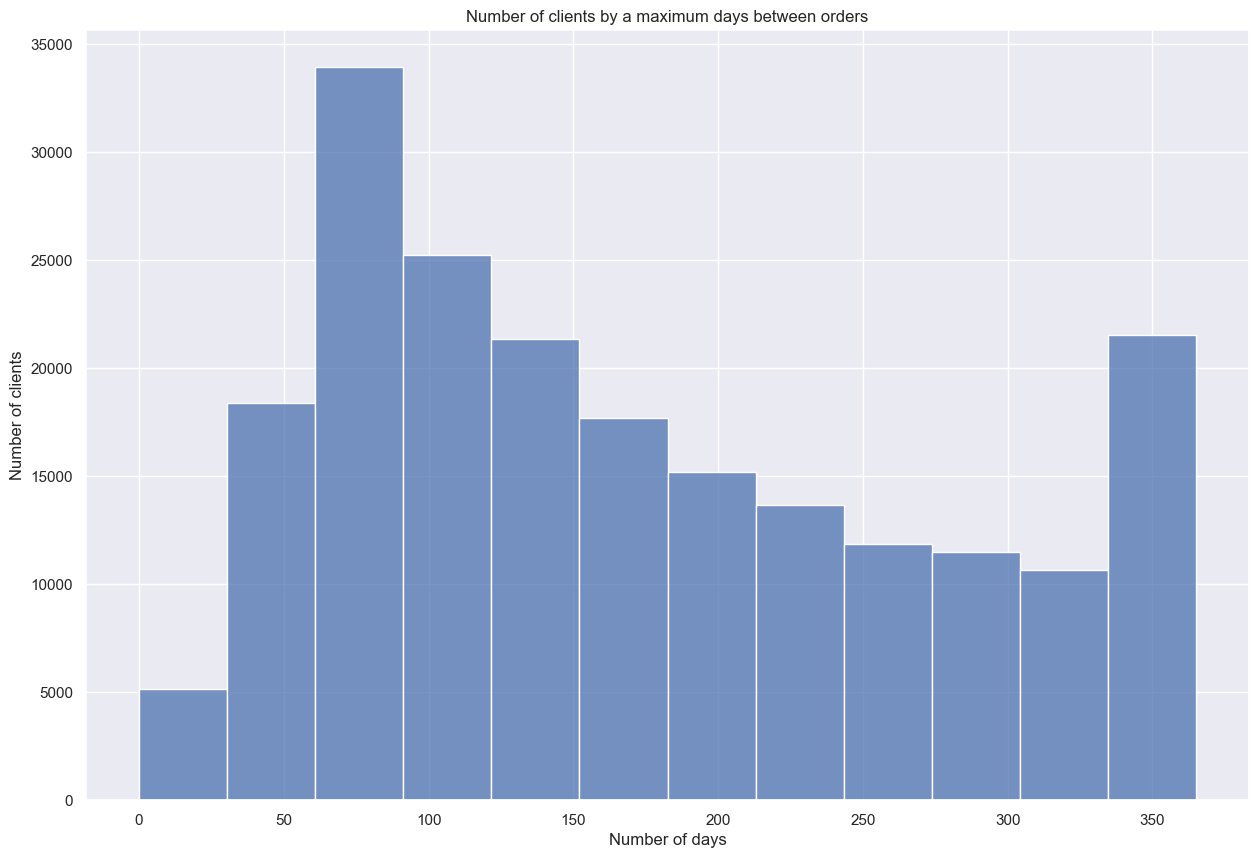

In [40]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.histplot(data=orders_client.to_pandas(), x="sum_days", bins=12)
ax.set_title("Number of clients by a maximum days between orders")
ax.set_xlabel("Number of days")
ax.set_ylabel("Number of clients")
plt.show()

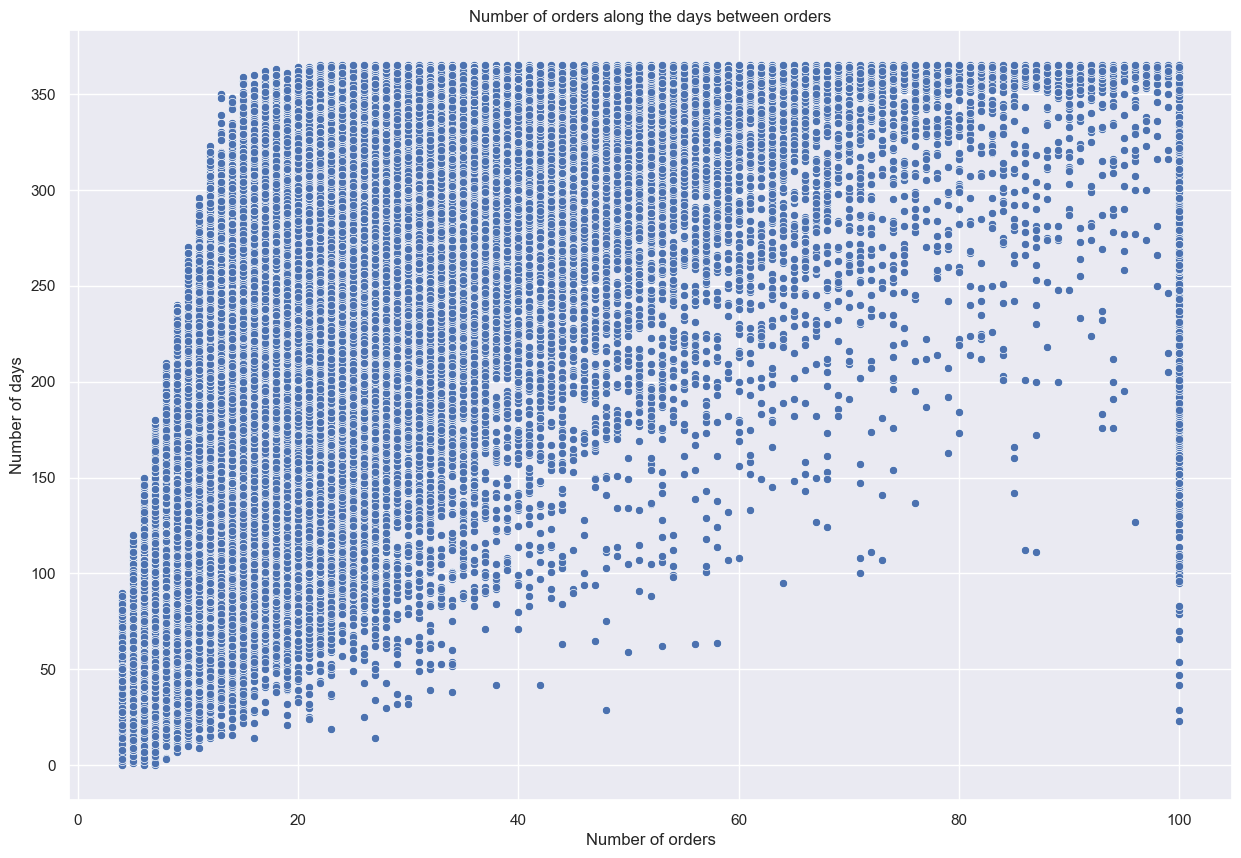

In [41]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.scatterplot(data=orders_client.to_pandas(), x="qtd_orders", y="sum_days")
ax.set_title("Number of orders along the days between orders")
ax.set_xlabel("Number of orders")
ax.set_ylabel("Number of days")
plt.show()

In [42]:
# let´s check the number of new clients and recurrent clients
new = len(orders_client.filter(pl.col("sum_days") < 31))
recurrent = len(orders_client.filter(pl.col("sum_days") > 30))
print(f"New clients: {new} ({new/(new+recurrent)*100:.2f}%)")
print(f"Recurrent clients: {recurrent} ({recurrent/(new+recurrent)*100:.2f}%)")


New clients: 5154 (2.50%)
Recurrent clients: 201055 (97.50%)


### 💡 Insights

> The database covers a period of 365 days.

> For this exercise, we will adapt the concept of new and recurrent clients: new clients are those with orders within a 30-day timespan, and recurrent clients are those with orders spanning more than 30 days. This is a conceptual approximation, necessary due to the absence of specific dates in the dataset.

> Based on this approach, we have:
- 5,154 new clients (2.5%)
- 201,055 recurrent clients (97.5%)

Ideally, we would expect new clients to constitute at least 20%. It is likely that the data on new clients is missing.

### 2.1.5 - Number of clientes by a average days between orders

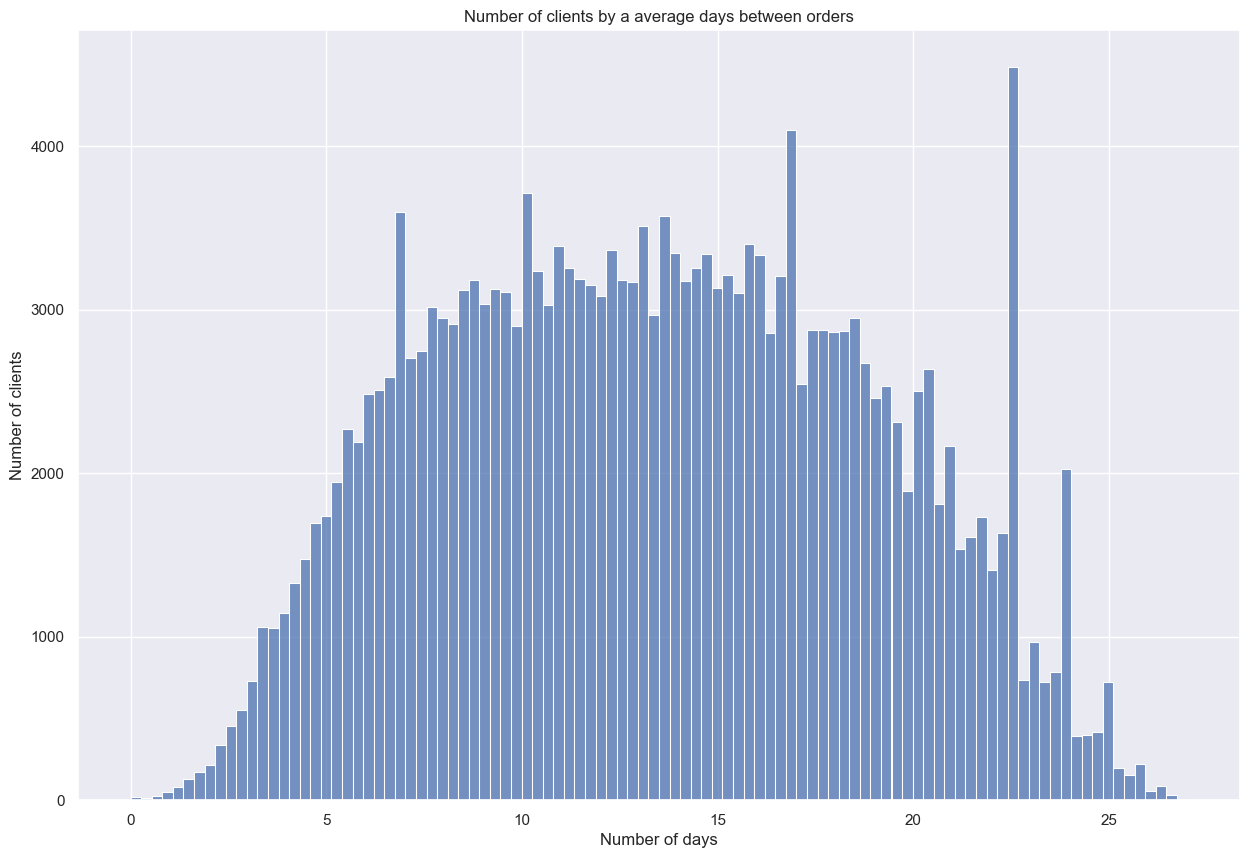

In [43]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.histplot(data=orders_client.to_pandas(), x="avg_days", bins=100)
ax.set_title("Number of clients by a average days between orders")
ax.set_xlabel("Number of days")
ax.set_ylabel("Number of clients")
plt.show()

In [44]:
# I´ll create a new dataset with some features for clients that will be used later
client_features = (orders_client
                   .select(
                           pl.col("user_id"),
                           pl.col("qtd_orders").alias("qty_orders"),
                           pl.col("sum_days").alias("longevity"),
                           pl.col("avg_days").alias("frequency")
                           )
                   )

client_features.head(10)

shape: (10, 4)
┌─────────┬────────────┬───────────┬───────────┐
│ user_id ┆ qty_orders ┆ longevity ┆ frequency │
│ ---     ┆ ---        ┆ ---       ┆ ---       │
│ i64     ┆ u32        ┆ i32       ┆ f64       │
╞═════════╪════════════╪═══════════╪═══════════╡
│ 101749  ┆ 4          ┆ 90        ┆ 22.5      │
│ 126103  ┆ 38         ┆ 277       ┆ 7.289474  │
│ 155468  ┆ 57         ┆ 304       ┆ 5.333333  │
│ 93082   ┆ 17         ┆ 273       ┆ 16.058824 │
│ 175416  ┆ 10         ┆ 171       ┆ 17.1      │
│ 111949  ┆ 4          ┆ 52        ┆ 13.0      │
│ 184717  ┆ 4          ┆ 90        ┆ 22.5      │
│ 203965  ┆ 8          ┆ 135       ┆ 16.875    │
│ 122584  ┆ 17         ┆ 311       ┆ 18.294118 │
│ 102773  ┆ 33         ┆ 363       ┆ 11.0      │
└─────────┴────────────┴───────────┴───────────┘

### 👩‍🦰 Client Features

For now, we have extracted three useful features:

- qty_orders
- longevity
- frequency

These features can provide insights into the age of our relationship with each client and the frequency of their interactions. They could serve as a foundation for calculating other important metrics, such as Client Lifetime Value.

In [45]:
# I'll save the data for the next analysis
client_features.write_parquet("data_output/client_features.parquet")

## 2.2 - Clustering

Clustering the clients and creating classes based on a combination of certain features might be useful. Let's give it a try.

In [46]:
# I'll use the dataset with orders by client that were created in the last session
orders_client.head(3)

shape: (3, 4)
┌─────────┬────────────┬──────────┬──────────┐
│ user_id ┆ qtd_orders ┆ sum_days ┆ avg_days │
│ ---     ┆ ---        ┆ ---      ┆ ---      │
│ i64     ┆ u32        ┆ i32      ┆ f64      │
╞═════════╪════════════╪══════════╪══════════╡
│ 101749  ┆ 4          ┆ 90       ┆ 22.5     │
│ 126103  ┆ 38         ┆ 277      ┆ 7.289474 │
│ 155468  ┆ 57         ┆ 304      ┆ 5.333333 │
└─────────┴────────────┴──────────┴──────────┘

### 2.2.1 - Clustering using qty orders and average days between orders

In [47]:
# sklearn do the job with Kmeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

### 🧑‍💻

> I will utilize the 'qtd_orders' and 'avg_days' variables.

> Since these variables are measured in different units, we will apply scaling to them to avoid introducing bias into the K-means model.

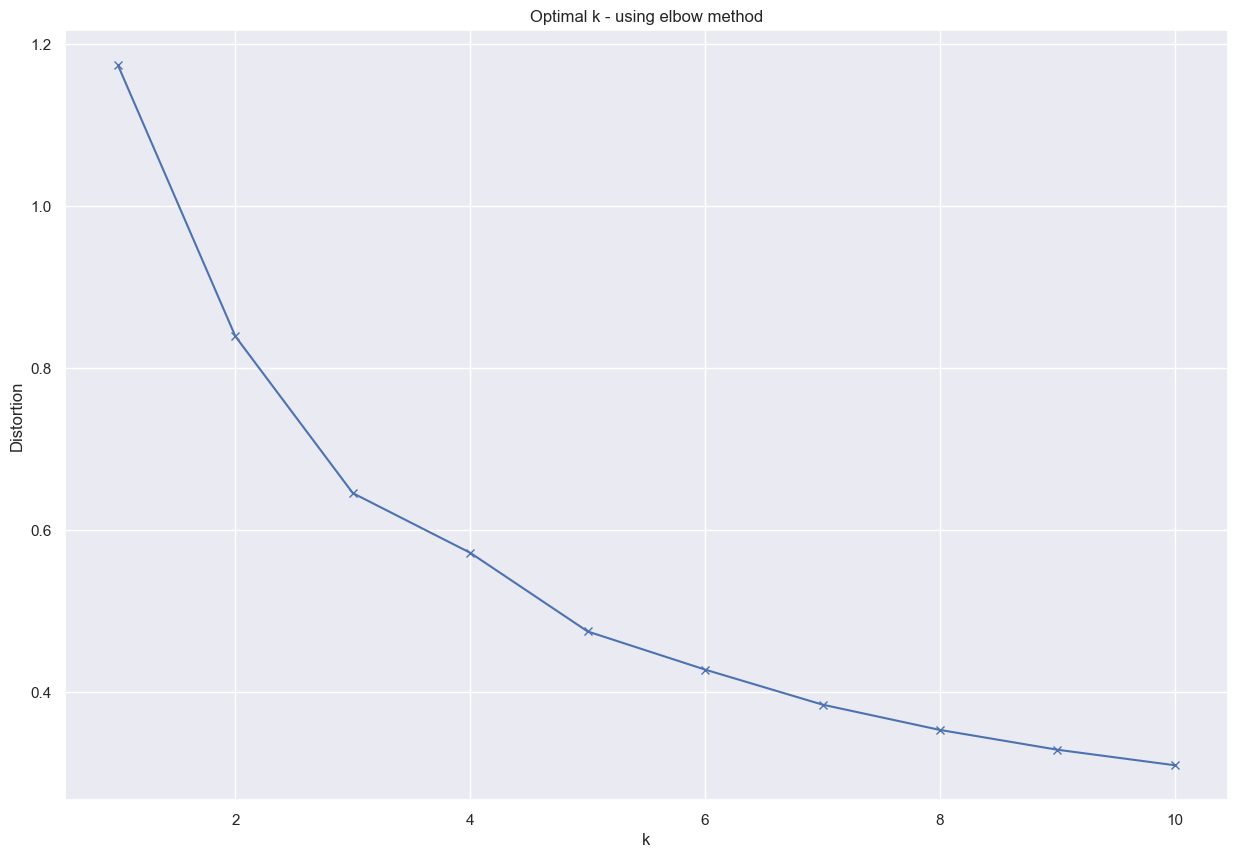

In [48]:
# The 'elbow' method could help us to find the optimal number of clusters

X = orders_client.sort('user_id').to_pandas()[["qtd_orders", "avg_days"]]

scaler = StandardScaler()
X = scaler.fit_transform(X[['qtd_orders', 'avg_days']])

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# graph
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k - using elbow method')
plt.show()

### 🧑‍💻
> The graph indicates that testing with a number between 3 and 5 is feasible. I think three would be a suitable choice.

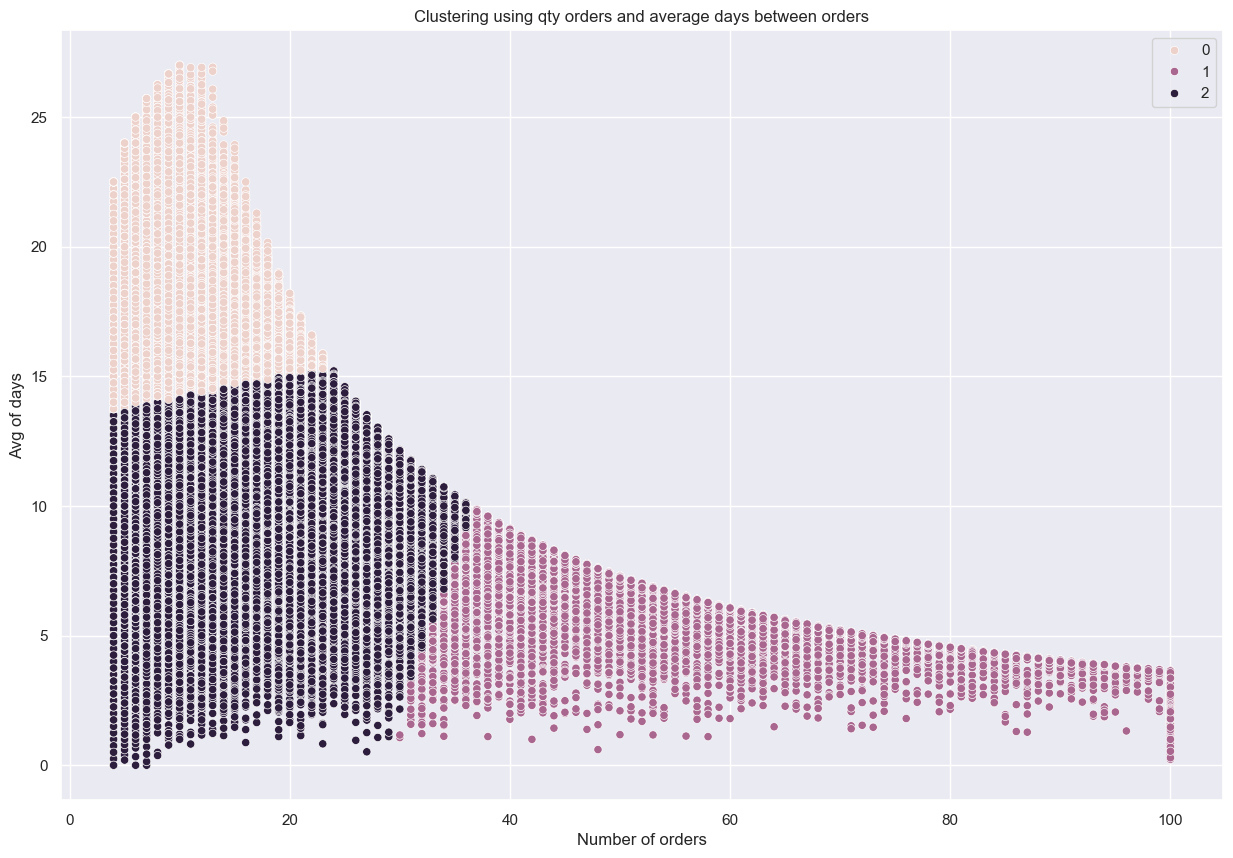

In [49]:
# model
kmeans = KMeans(n_clusters=3, n_init=10).fit(X)
kmeans.fit(X)

# graph
df = orders_client.sort('user_id').to_pandas()[["qtd_orders", "avg_days"]]
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.scatterplot(data=df, x="qtd_orders", y="avg_days", hue=kmeans.labels_)
ax.set_title("Clustering using qty orders and average days between orders")
ax.set_xlabel("Number of orders")
ax.set_ylabel("Avg of days")
plt.show()

In [50]:
# I'll add the cluster label to the dataset and add to our client features dataset
# this feature will be named 'cluster_loyalty'
df = orders_client.sort('user_id').to_pandas()
df['cluster_loyalty'] = kmeans.labels_

# back to polars
cluster_loyalty = pl.from_pandas(df)

client_features = (client_features
                   .join(cluster_loyalty, on="user_id")
                   .select(pl.col(["user_id","qty_orders","longevity","frequency","cluster_loyalty"]))
                   )

client_features.head(3)

shape: (3, 5)
┌─────────┬────────────┬───────────┬───────────┬─────────────────┐
│ user_id ┆ qty_orders ┆ longevity ┆ frequency ┆ cluster_loyalty │
│ ---     ┆ ---        ┆ ---       ┆ ---       ┆ ---             │
│ i64     ┆ u32        ┆ i32       ┆ f64       ┆ i32             │
╞═════════╪════════════╪═══════════╪═══════════╪═════════════════╡
│ 1       ┆ 11         ┆ 190       ┆ 17.272727 ┆ 0               │
│ 2       ┆ 15         ┆ 228       ┆ 15.2      ┆ 0               │
│ 3       ┆ 13         ┆ 144       ┆ 11.076923 ┆ 2               │
└─────────┴────────────┴───────────┴───────────┴─────────────────┘

In [51]:
# I'll save the data for the next analysis
client_features.write_parquet("data_output/client_features.parquet")

### 👩‍🦰 Client Features

> We have introduced a new feature named 'cluster_loyalty,' derived from a k-means model that utilizes 'qty_orders' and 'frequency' as variables.
- Clients in cluster 0 exhibit higher loyalty, potentially indicating a high Customer Lifetime Value (CLV).
- The loyalty level of clients in cluster 2 is considered moderate.
</br>
</br>



### 🪄 Recommendations

> Marketing could leverage this feature to target campaigns more effectively towards clients who are likely to have a higher Customer Lifetime Value (CLV).

> Additionally, this segmentation could be instrumental in conducting studies and simulations to determine which clients are more likely to engage positively with a loyalty program.

### 2.2.2 - Clustering Using Frequently Consumed Items by Department and Aisle
Let's explore whether it's possible to cluster based on customer preferences for specific categories of items.

### 🧑‍💻 Strategy
> In this section, we will focus on categorical variables (department and aisle). Due to their nature, I'll convert them into dummy variables.

> Additionally, I'll sum the dummy variables for each client to create a dataset with one row per client.

In [52]:
dummy_orders_products = (orders_products
                         .to_dummies(["department","aisle"])
                         .drop(["order_id", "product_id","order_hour_of_day","day_of_week"])
                         .group_by("user_id")
                         .sum()           
)

dummy_orders_products.head(3)

shape: (3, 156)
┌─────────┬────────────────────┬───────────────────┬───────────────────┬───┬────────────────────────────┬─────────────────────────────────────┬───────────────────┬──────────────┐
│ user_id ┆ department_alcohol ┆ department_babies ┆ department_bakery ┆ … ┆ aisle_vitamins supplements ┆ aisle_water seltzer sparkling water ┆ aisle_white wines ┆ aisle_yogurt │
│ ---     ┆ ---                ┆ ---               ┆ ---               ┆   ┆ ---                        ┆ ---                                 ┆ ---               ┆ ---          │
│ i64     ┆ i64                ┆ i64               ┆ i64               ┆   ┆ i64                        ┆ i64                                 ┆ i64               ┆ i64          │
╞═════════╪════════════════════╪═══════════════════╪═══════════════════╪═══╪════════════════════════════╪═════════════════════════════════════╪═══════════════════╪══════════════╡
│ 123111  ┆ 0                  ┆ 0                 ┆ 0                 ┆ … ┆ 0                          ┆ 11                                  ┆ 0                 ┆ 11           │
│ 59927   ┆ 0                  ┆ 0                 ┆ 1                 ┆ … ┆ 0                          ┆ 30                                  ┆ 0                 ┆ 18           │
│ 4338    ┆ 0                  ┆ 0                 ┆ 0                 ┆ … ┆ 0                          ┆ 0                                   ┆ 0                 ┆ 0            │
└─────────┴────────────────────┴───────────────────┴───────────────────┴───┴────────────────────────────┴─────────────────────────────────────┴───────────────────┴──────────────┘

In [53]:
# number of clients
len(dummy_orders_products)

206209

🧑‍💻
>  I'm applying the elbow method again to gain insight into the optimal number of clusters that could be used.

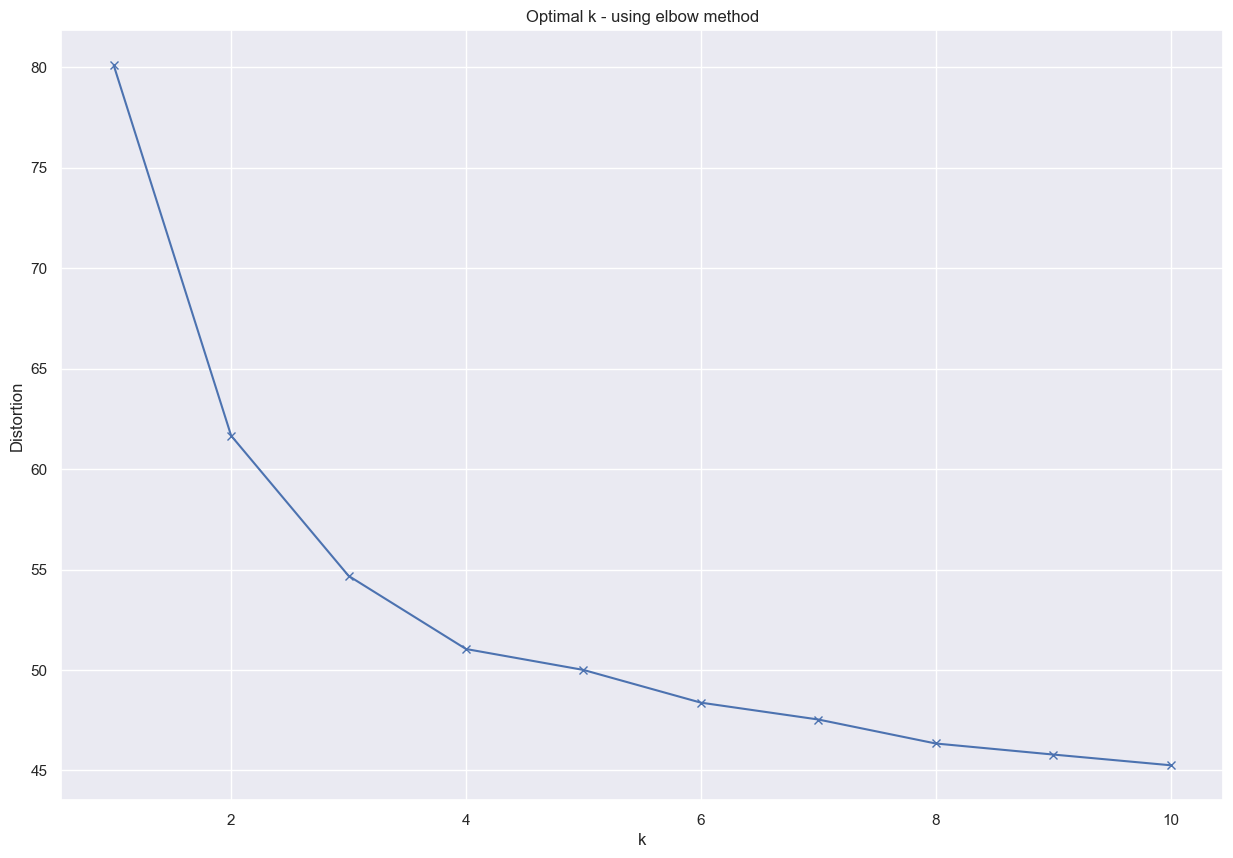

In [54]:
# elbow graph
X = dummy_orders_products.sort('user_id').to_pandas()
X.set_index('user_id', inplace=True)

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# graph
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k - using elbow method')
plt.show()

### 🧑‍💻
> I will go with three clusters.

> Now, I will plot a scatter graph to show the clusters and their centroids.

> Principal Component Analysis (PCA) will be applied to reduce the dimensionality to two, which will facilitate easier visualization of the graph.

C:\Users\roger\AppData\Local\Temp\ipykernel_13164\987421868.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pd_orders_products['cluster_product'] = label


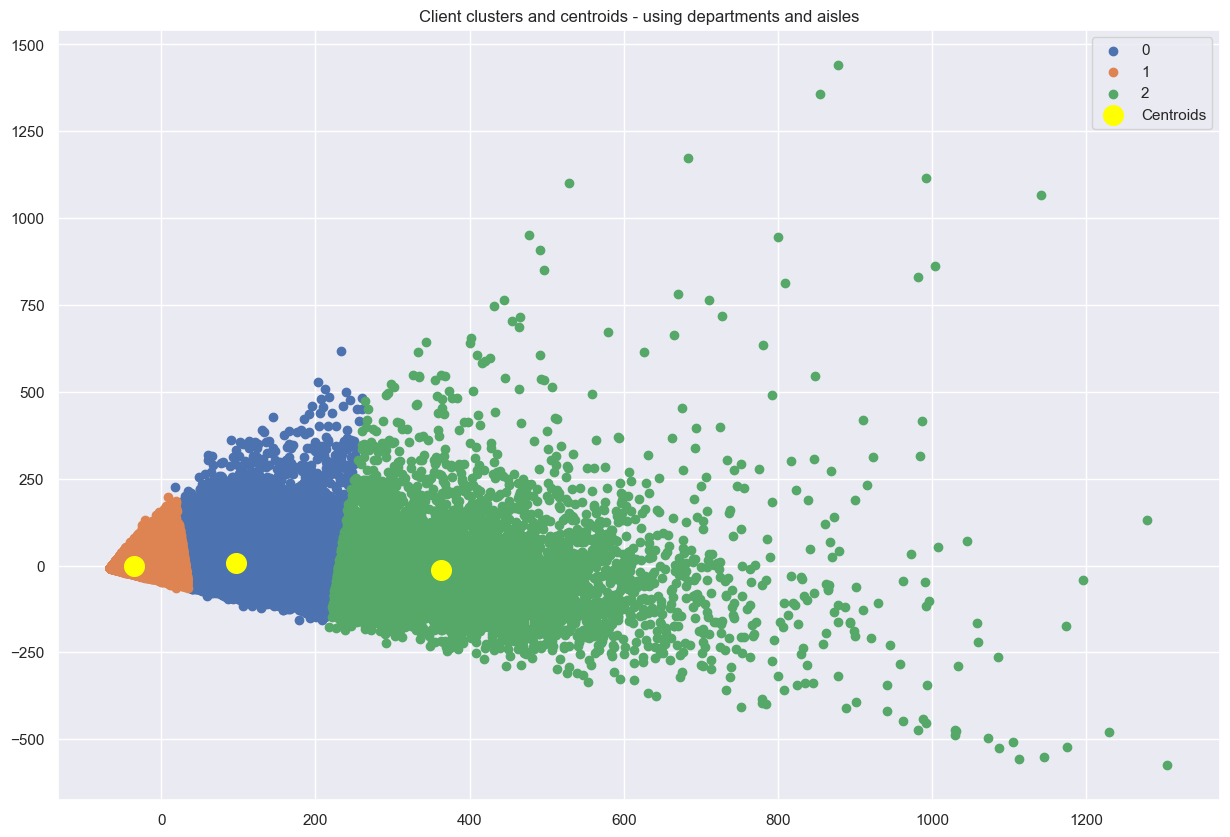

In [55]:
from sklearn.decomposition import PCA

# data
pd_orders_products = dummy_orders_products.sort('user_id').to_pandas()
pd_orders_products.set_index('user_id', inplace=True)

# model
pca = PCA(2)
X = pca.fit_transform(pd_orders_products)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0).fit(X)
label = kmeans.fit_predict(X)
u_labels = np.unique(label)
pd_orders_products['cluster_product'] = label


# graph
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')

plt.legend()
plt.title('Client clusters and centroids - using departments and aisles')
plt.show()

### 🕵️ Could a 3D graph provide a better visualization for the clusters?

Let's try.

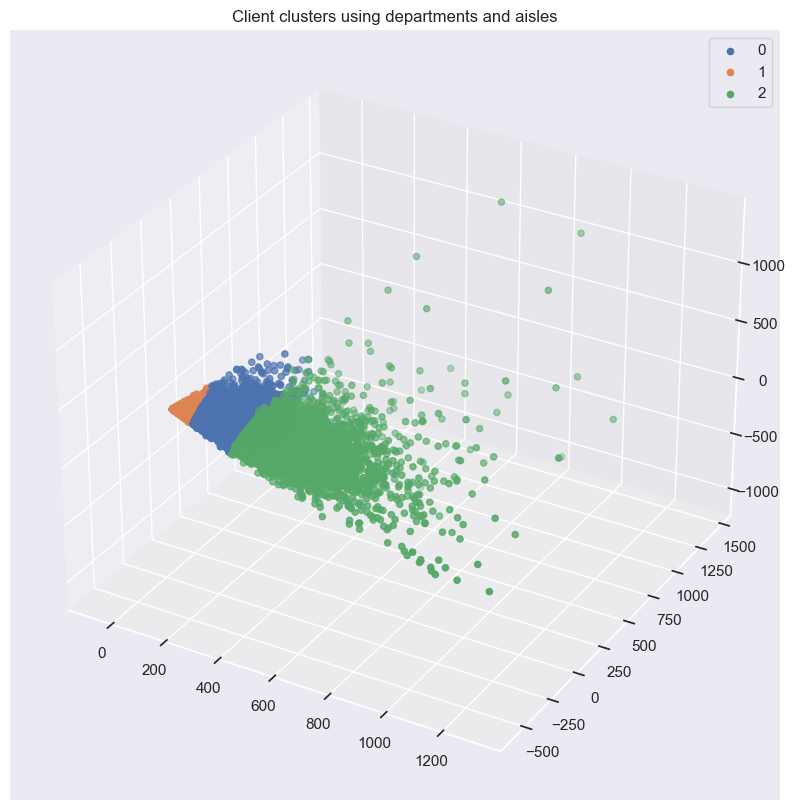

In [56]:
# model
pca = PCA(3)
X = pca.fit_transform(pd_orders_products)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0).fit(X)
label = kmeans.fit_predict(X)
u_labels = np.unique(label)


# graph
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in u_labels:
    ax.scatter(X[label == i , 0] , X[label == i , 1] , X[label == i , 2] , label = i)


ax.legend()
plt.title('Client clusters using departments and aisles')
plt.show()

In [57]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.animation import FuncAnimation

# def update(frame):
#     ax.view_init(elev=10., azim=frame)
#     return fig,

# anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=50)

# from IPython.display import HTML
# HTML(anim.to_html5_video())

# anim.save('rotation_animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])


### 🕵️ How many clients are in each cluster?


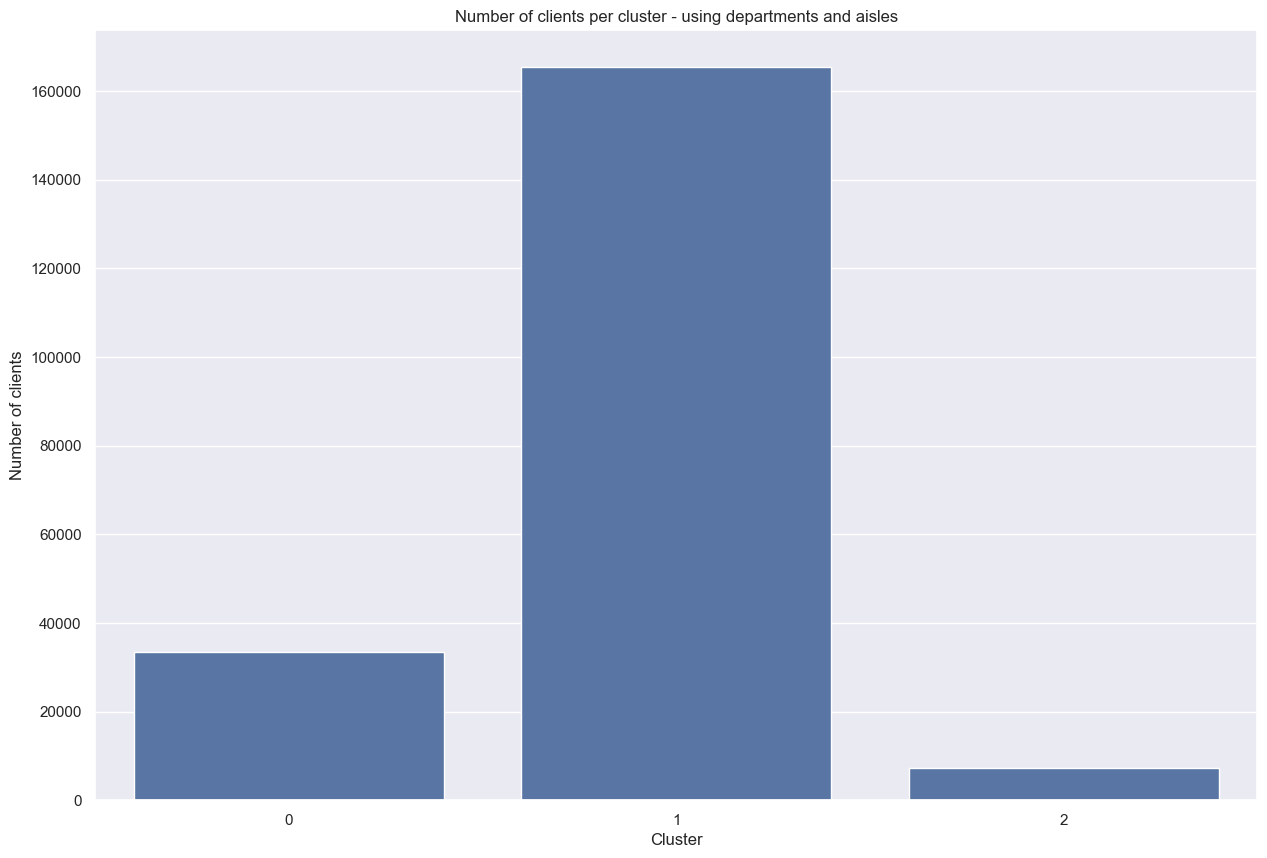

In [58]:
# number of clients per cluster
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(x="cluster_product", data=pd_orders_products)
ax.set_title("Number of clients per cluster - using departments and aisles")
ax.set_xlabel("Cluster")
ax.set_ylabel("Number of clients")
plt.show()

> Saving the new feature

In [79]:
# I'll add the cluster label to the dataset and add to our client features dataset
# this feature will be named 'cluster_loyalty'
df = orders_client.sort('user_id').to_pandas()
df['cluster_product'] = label

# back to polars
cluster_product = pl.from_pandas(df)

client_features = (client_features
                   .join(cluster_product, on="user_id")
                   .select(pl.col(["user_id","qty_orders","longevity","frequency","cluster_loyalty","cluster_product"]))
                   )

### 🕵️ Is it possible to discern some meaning in these clusters? What exactly do they represent?

Unsupervised methods such as K-means don't always yield meaningful results (they can be useful but not always explainable).

Let's attempt to understand these clusters, especially in terms of the products that clients frequently order, categorized by department and aisles.

</br>




### 🧑‍💻 Strategy

The goal is to identify the types of products that are most frequently consumed by the clients in each cluster.

Then, we will plot this data in a manner that facilitates the easy identification of patterns.

We will focus on the top 20 types of products (aisles).

In [61]:
# data
dp_departments = client_features.to_pandas()[["user_id","cluster_product"]]
dp_op = orders_products.to_pandas()

# tranformation
top_aisles_per_cluster = dp_op.groupby(['user_id', 'aisle']).size().reset_index(name='count')
top_aisles_per_cluster = top_aisles_per_cluster.sort_values(['user_id', 'count'], ascending=[True, False])
top_aisles_per_cluster = top_aisles_per_cluster.groupby('user_id').head(1)
top_aisles_per_cluster = top_aisles_per_cluster[['user_id', 'aisle']]
top_aisles_per_cluster = top_aisles_per_cluster.join(dp_departments.set_index('user_id'), on='user_id')
top_aisles_per_cluster = top_aisles_per_cluster.groupby(['cluster_product', 'aisle']).count().reset_index()
top_aisles_per_cluster = top_aisles_per_cluster.rename(columns={'user_id': 'qty_clients', 'cluster_product': 'cluster'})
top_aisles_per_cluster['total_clients'] = top_aisles_per_cluster.groupby(['cluster'])['qty_clients'].transform('sum')
top_aisles_per_cluster['percentage'] = top_aisles_per_cluster['qty_clients'] / top_aisles_per_cluster['total_clients']
top_aisles_per_cluster = top_aisles_per_cluster.groupby(['cluster']).head(20)
top_aisles_per_cluster.head(3)

cluster                   aisle  qty_clients  total_clients  percentage
0        0  air fresheners candles            1          33564    0.000030
1        0             asian foods            4          33564    0.000119
2        0       baby food formula          711          33564    0.021183

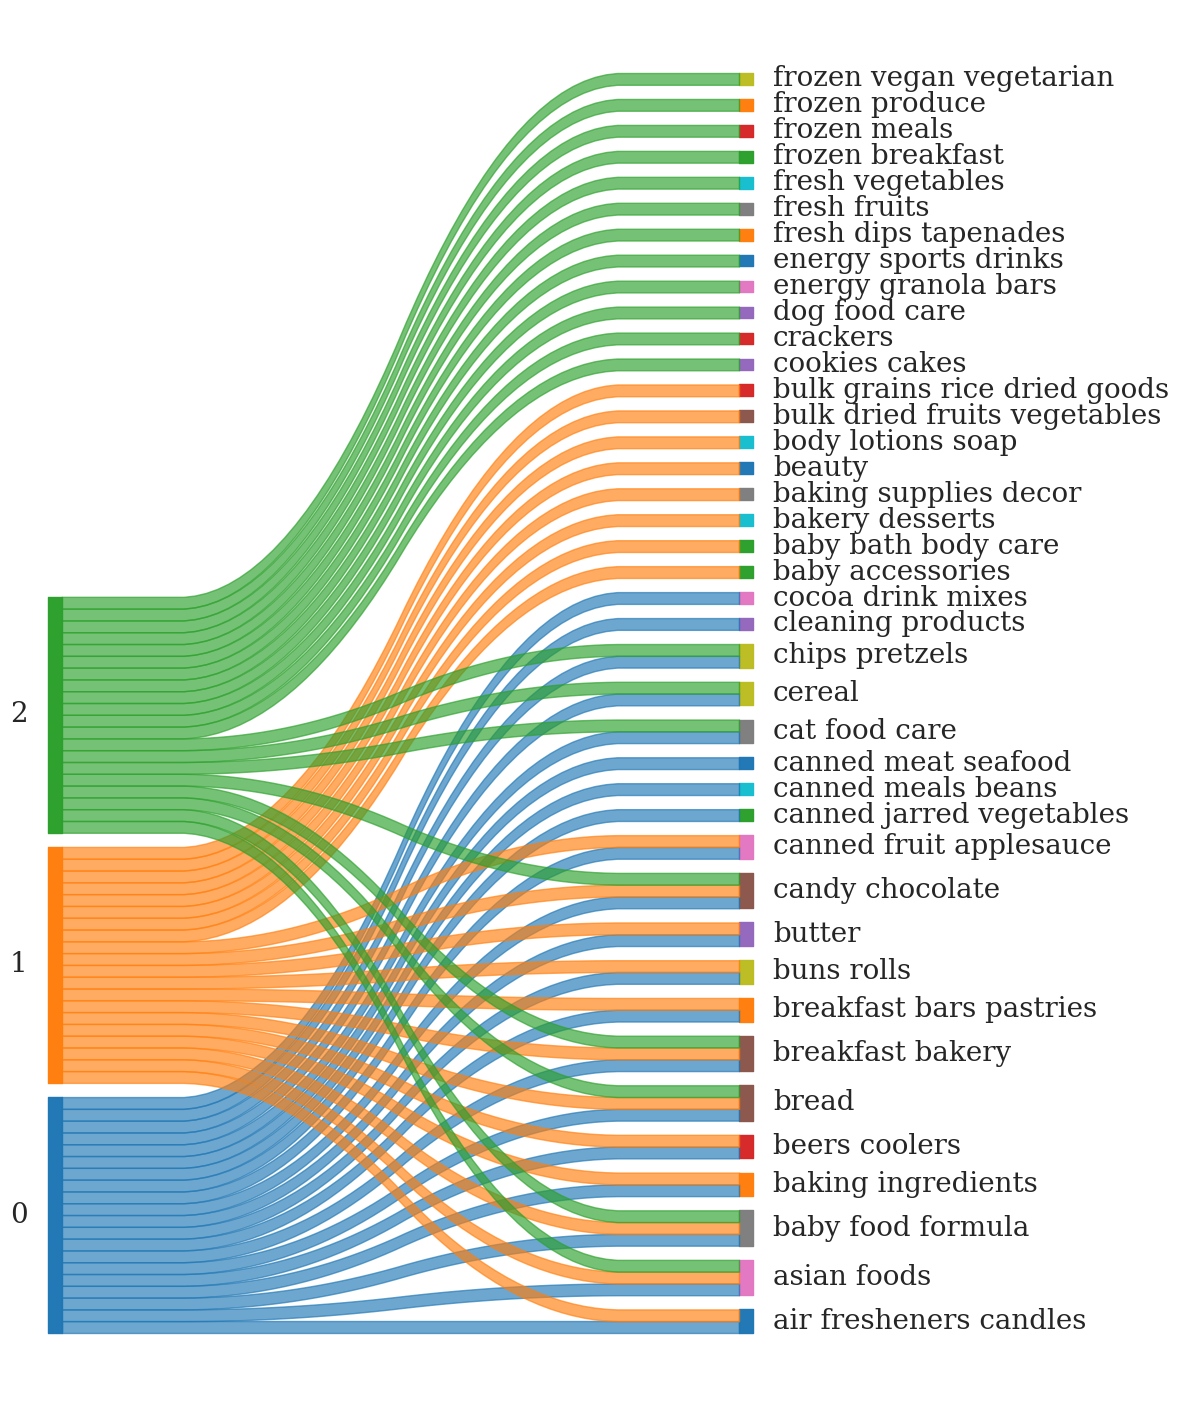

In [62]:
# I'll use a sankey diagram to visualize the top aisles per cluster
from pySankey.sankey import sankey

color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a color dictionary for your items
unique_items = list(set(top_aisles_per_cluster['cluster']) | set(top_aisles_per_cluster['aisle']))
color_dict = {item: color_palette[i % len(color_palette)] for i, item in enumerate(unique_items)}

sankey(
    left=top_aisles_per_cluster["cluster"], right=top_aisles_per_cluster["aisle"], 
    aspect=20, fontsize=20, colorDict=color_dict
)

fig = plt.gcf()
fig.set_size_inches(10, 18)
fig.set_facecolor("w")
fig.savefig("clusters_aisle.png", bbox_inches="tight", dpi=150)

### 🪄 Recommendations

> The above graph provides insights into the items most consumed by each cluster, which could aid in understanding the profile of each group.

> Further analysis is needed, but this initial example could be utilized by the marketing department to segment campaigns:
- Cluster 2 has a preference for frozen meals, fresh fruits, and vegetables.
- Cluster 0 appears more traditional, favoring canned meals.
- Cluster 1 shows a preference for baking and bakery items, along with a notable interest in beauty and baby products.

</br>
</br>


### 2.2.3 - Clustering using week day and hour

🧑‍💻 I´ll prepare the data for the clustering model 

In [63]:
op_day = (orders
          .select(pl.col(["order_id","user_id","order_hour_of_day","order_dow"]))
          .sort('order_id')
)

scaler = StandardScaler()
time = scaler.fit_transform(op_day[['order_hour_of_day', 'order_dow']])
time = pd.DataFrame(time, columns=['order_hour_of_day', 'order_dow'])
time = pl.from_pandas(time)

op_day_source = op_day
op_day = op_day.drop(['order_hour_of_day', 'order_dow'])
op_day = pl.concat([op_day, time], how='horizontal')


op_day = (op_day
          .group_by("user_id")
          .agg(
              pl.mean("order_hour_of_day").alias("avg_hour"),
              pl.mean("order_dow").alias("avg_day")
              )
              .sort('user_id')
)

op_day_source = (op_day_source
                 .group_by("user_id")
                 .agg(
                     pl.mean("order_hour_of_day").alias("avg_hour"),
                     pl.mean("order_dow").alias("avg_day")
                     )
                     .sort('user_id')
                     )

op_day.head(3)

shape: (3, 3)
┌─────────┬───────────┬───────────┐
│ user_id ┆ avg_hour  ┆ avg_day   │
│ ---     ┆ ---       ┆ ---       │
│ i64     ┆ f64       ┆ f64       │
╞═════════╪═══════════╪═══════════╡
│ 1       ┆ -0.795323 ┆ -0.068328 │
│ 2       ┆ -0.674859 ┆ -0.346659 │
│ 3       ┆ 0.675726  ┆ -0.679883 │
└─────────┴───────────┴───────────┘

In [64]:
op_day_source.head(3)

shape: (3, 3)
┌─────────┬───────────┬──────────┐
│ user_id ┆ avg_hour  ┆ avg_day  │
│ ---     ┆ ---       ┆ ---      │
│ i64     ┆ f64       ┆ f64      │
╞═════════╪═══════════╪══════════╡
│ 1       ┆ 10.090909 ┆ 2.636364 │
│ 2       ┆ 10.6      ┆ 2.066667 │
│ 3       ┆ 16.307692 ┆ 1.384615 │
└─────────┴───────────┴──────────┘

### 🧑‍💻 Strategy

> This time, we will use an algorithm different from K-means, which I think will not perform well for this type of data (I've tested both K-means and DBSCAN and was not satisfied with the results).

> I've chosen the Gaussian Mixture Model.

> I've tried three, four, five and six clusters, and decided to use six clusters.

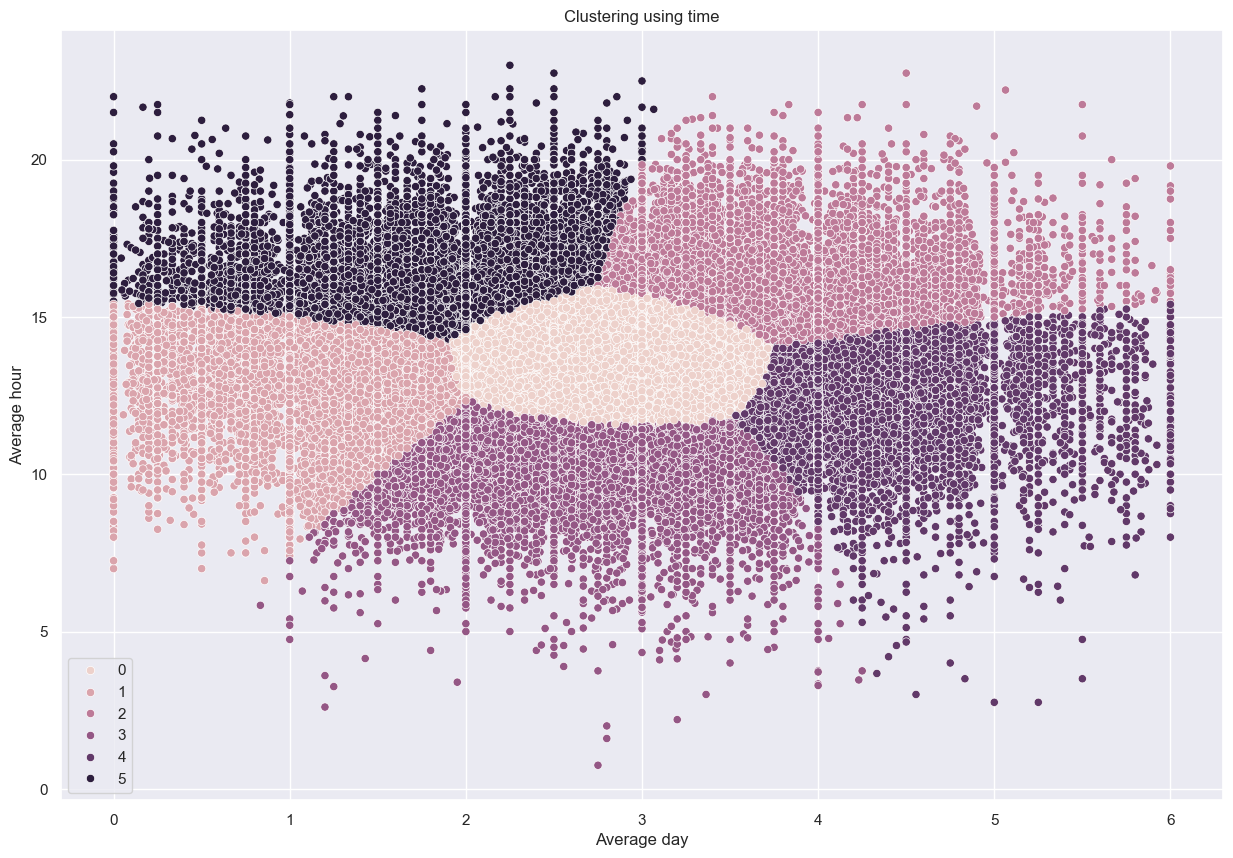

In [65]:
# data
dp_op_day = op_day.sort('user_id').to_pandas()
dp_op_day.set_index('user_id', inplace=True)

dp_op_day_source = op_day_source.sort('user_id').to_pandas()
dp_op_day_source.set_index('user_id', inplace=True)

# model
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6, random_state=0).fit(dp_op_day)
labels = gmm.predict(dp_op_day)
dp_op_day['cluster_time'] = labels

# graph
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.scatterplot(data=dp_op_day_source, x="avg_day", y="avg_hour", hue=labels)
ax.set_title("Clustering using time")
ax.set_xlabel("Average day")
ax.set_ylabel("Average hour")
plt.show()


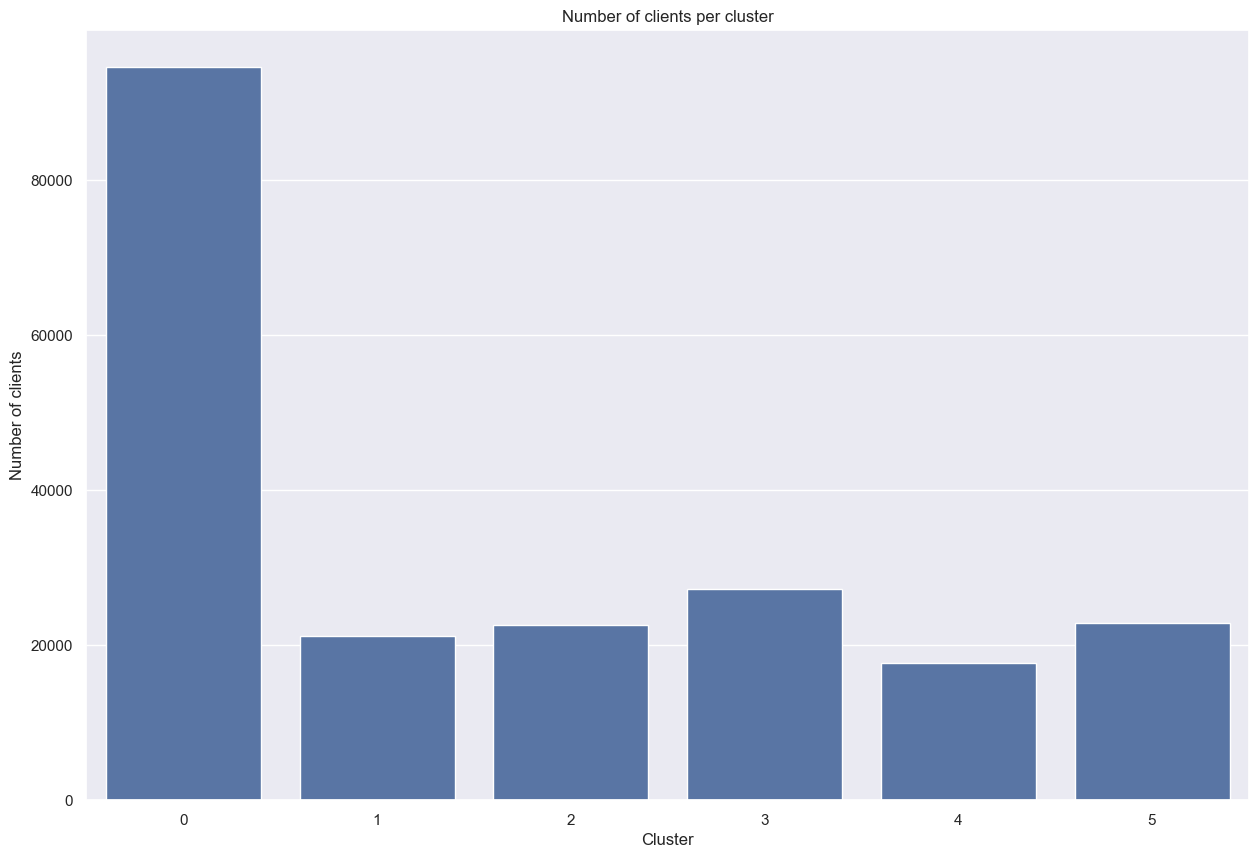

In [66]:
# number of clients per cluster
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(x="cluster_time", data=dp_op_day)
ax.set_title("Number of clients per cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("Number of clients")
plt.show()

In [67]:
cluster_time = pl.from_pandas(dp_op_day).select(pl.col(["cluster_time"]))
cluster_time = pl.concat([op_day, cluster_time], how='horizontal')
cluster_time = cluster_time.select(['user_id','cluster_time'])
cluster_time.head(3)

shape: (3, 2)
┌─────────┬──────────────┐
│ user_id ┆ cluster_time │
│ ---     ┆ ---          │
│ i64     ┆ i64          │
╞═════════╪══════════════╡
│ 1       ┆ 3            │
│ 2       ┆ 3            │
│ 3       ┆ 5            │
└─────────┴──────────────┘

In [68]:
cluster_time.group_by("cluster_time").agg(pl.count("user_id").alias("qty_clients")).sort('cluster_time')

shape: (6, 2)
┌──────────────┬─────────────┐
│ cluster_time ┆ qty_clients │
│ ---          ┆ ---         │
│ i64          ┆ u32         │
╞══════════════╪═════════════╡
│ 0            ┆ 94611       │
│ 1            ┆ 21205       │
│ 2            ┆ 22548       │
│ 3            ┆ 27264       │
│ 4            ┆ 17706       │
│ 5            ┆ 22875       │
└──────────────┴─────────────┘

In [80]:
client_features = (client_features
                   .join(cluster_time, on="user_id")
                   .select(pl.col(["user_id","qty_orders","longevity","frequency","cluster_loyalty","cluster_product","cluster_time"]))
                   )

client_features.head(3)

shape: (3, 7)
┌─────────┬────────────┬───────────┬───────────┬─────────────────┬─────────────────┬──────────────┐
│ user_id ┆ qty_orders ┆ longevity ┆ frequency ┆ cluster_loyalty ┆ cluster_product ┆ cluster_time │
│ ---     ┆ ---        ┆ ---       ┆ ---       ┆ ---             ┆ ---             ┆ ---          │
│ i64     ┆ u32        ┆ i32       ┆ f64       ┆ i32             ┆ i32             ┆ i64          │
╞═════════╪════════════╪═══════════╪═══════════╪═════════════════╪═════════════════╪══════════════╡
│ 1       ┆ 11         ┆ 190       ┆ 17.272727 ┆ 0               ┆ 1               ┆ 3            │
│ 2       ┆ 15         ┆ 228       ┆ 15.2      ┆ 0               ┆ 1               ┆ 3            │
│ 3       ┆ 13         ┆ 144       ┆ 11.076923 ┆ 2               ┆ 1               ┆ 5            │
└─────────┴────────────┴───────────┴───────────┴─────────────────┴─────────────────┴──────────────┘

In [81]:
client_features.group_by("cluster_time").agg(pl.sum("qty_orders")).sort("cluster_time")

shape: (6, 2)
┌──────────────┬────────────┐
│ cluster_time ┆ qty_orders │
│ ---          ┆ ---        │
│ i64          ┆ u32        │
╞══════════════╪════════════╡
│ 0            ┆ 1940797    │
│ 1            ┆ 257369     │
│ 2            ┆ 285682     │
│ 3            ┆ 459659     │
│ 4            ┆ 213137     │
│ 5            ┆ 264439     │
└──────────────┴────────────┘

### 👩‍🦰 Client Features

> We have introduced a new feature named 'cluster_time,' derived from a gaussian mixture model that utilizes hour of the day and day of week.
</br>
</br>

### 🕵️ "Let's investigate whether the clusters based on time and hour hold any significant meaning.

In [82]:
mt_time = (orders
           .select(pl.col(["order_id","user_id","order_hour_of_day","day_of_week","order_dow"]))
           .group_by(["user_id","order_hour_of_day","day_of_week","order_dow"])
           .agg(pl.count("order_id").alias("qty_orders"))
           .join(client_features, on="user_id")
           .select(pl.col(["user_id","order_hour_of_day","day_of_week","order_dow","cluster_time","qty_orders"]))
           .with_columns(pl.col("order_dow").cast(pl.Utf8))
           .with_columns((pl.col("order_dow") + ":" + pl.col("day_of_week")).alias("day_of_week_number"))
           .select(pl.col(["user_id","order_hour_of_day","day_of_week_number","cluster_time","qty_orders"]))
           .sort('user_id')
          )

mt_time = mt_time.group_by(["order_hour_of_day","day_of_week_number","cluster_time"]).agg(pl.sum("qty_orders").alias("qty_orders"))

mt_time.head(3)

shape: (3, 4)
┌───────────────────┬────────────────────┬──────────────┬────────────┐
│ order_hour_of_day ┆ day_of_week_number ┆ cluster_time ┆ qty_orders │
│ ---               ┆ ---                ┆ ---          ┆ ---        │
│ i64               ┆ str                ┆ i64          ┆ u32        │
╞═══════════════════╪════════════════════╪══════════════╪════════════╡
│ 16                ┆ 1:Monday           ┆ 3            ┆ 2757       │
│ 7                 ┆ 2:Tuesday          ┆ 3            ┆ 4746       │
│ 12                ┆ 3:Wednesday        ┆ 5            ┆ 1239       │
└───────────────────┴────────────────────┴──────────────┴────────────┘

In [83]:
mt_time.group_by("cluster_time").agg(pl.sum("qty_orders").alias("qty_orders"))

shape: (6, 2)
┌──────────────┬────────────┐
│ cluster_time ┆ qty_orders │
│ ---          ┆ ---        │
│ i64          ┆ u32        │
╞══════════════╪════════════╡
│ 2            ┆ 285682     │
│ 0            ┆ 1940797    │
│ 1            ┆ 257369     │
│ 4            ┆ 213137     │
│ 3            ┆ 459659     │
│ 5            ┆ 264439     │
└──────────────┴────────────┘

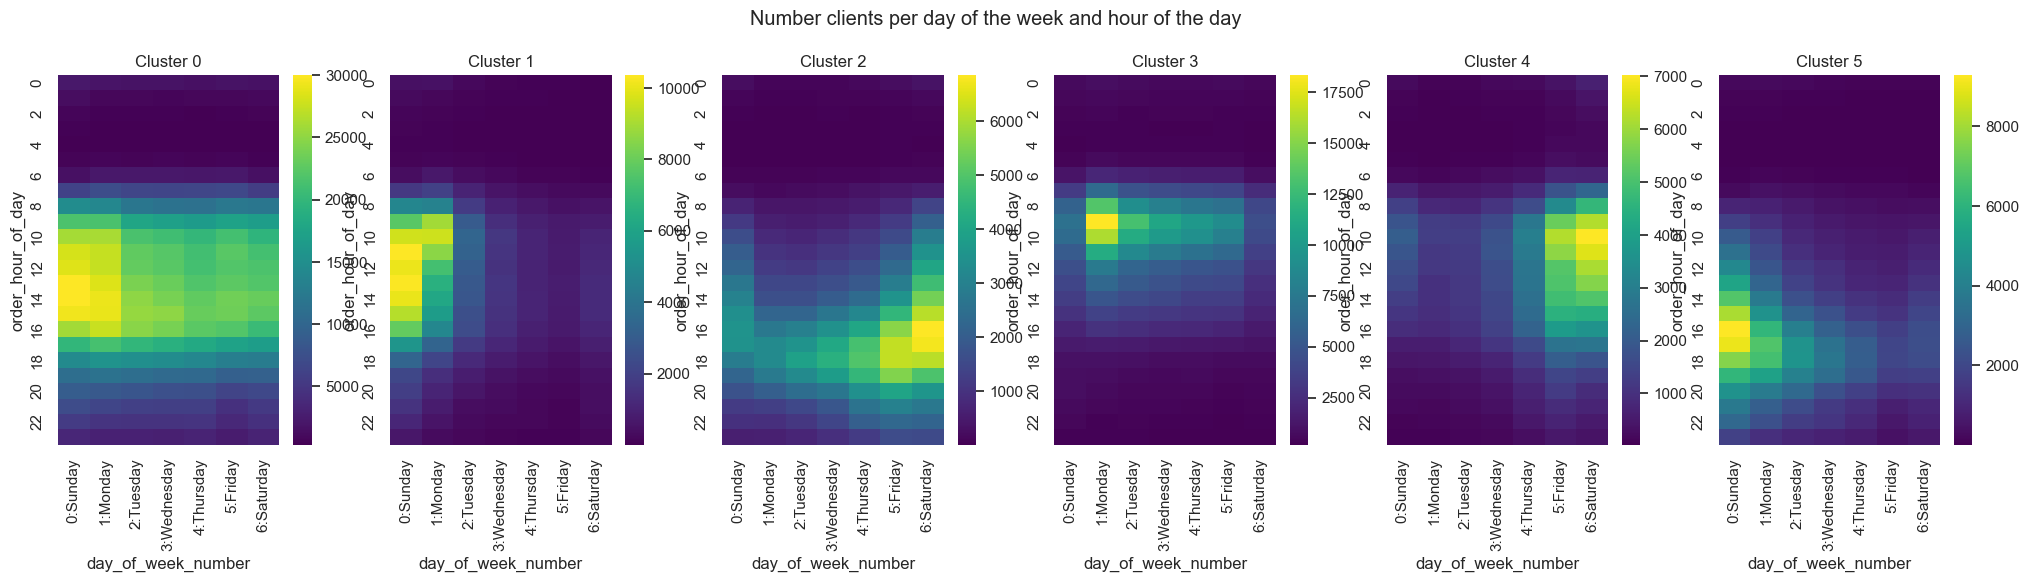

In [84]:
pd_mt_time = mt_time.to_pandas()

fig, axs = plt.subplots(1, 6, figsize=(25, 5))
fig.suptitle('Number clients per day of the week and hour of the day')
fig.subplots_adjust(top=0.85)
axs[0].set_title('Cluster 0')
axs[1].set_title('Cluster 1')
axs[2].set_title('Cluster 2')
axs[3].set_title('Cluster 3')
axs[4].set_title('Cluster 4')
axs[5].set_title('Cluster 5')
sns.heatmap(pd_mt_time[pd_mt_time.cluster_time == 0].pivot_table(index="order_hour_of_day", columns="day_of_week_number", values="qty_orders", aggfunc="sum"), cmap="viridis", annot=False, cbar=True, ax=axs[0])
sns.heatmap(pd_mt_time[pd_mt_time.cluster_time == 1].pivot_table(index="order_hour_of_day", columns="day_of_week_number", values="qty_orders", aggfunc="sum"), cmap="viridis", annot=False, cbar=True, ax=axs[1])
sns.heatmap(pd_mt_time[pd_mt_time.cluster_time == 2].pivot_table(index="order_hour_of_day", columns="day_of_week_number", values="qty_orders", aggfunc="sum"), cmap="viridis", annot=False, cbar=True, ax=axs[2])
sns.heatmap(pd_mt_time[pd_mt_time.cluster_time == 3].pivot_table(index="order_hour_of_day", columns="day_of_week_number", values="qty_orders", aggfunc="sum"), cmap="viridis", annot=False, cbar=True, ax=axs[3])
sns.heatmap(pd_mt_time[pd_mt_time.cluster_time == 4].pivot_table(index="order_hour_of_day", columns="day_of_week_number", values="qty_orders", aggfunc="sum"), cmap="viridis", annot=False, cbar=True, ax=axs[4])
sns.heatmap(pd_mt_time[pd_mt_time.cluster_time == 5].pivot_table(index="order_hour_of_day", columns="day_of_week_number", values="qty_orders", aggfunc="sum"), cmap="viridis", annot=False, cbar=True, ax=axs[5])

plt.show()

### 🏆 New Features!

At the end of this session, we've engineered insightful features for clients:
- user_id
- qty_orders
- longevity
- frequency
- cluster_loyalty
- cluster_product
- cluster_time


These new features could be used in client segmentation, as well as serve as input for other models

In [87]:
client_features.head(5)

shape: (5, 7)
┌─────────┬────────────┬───────────┬───────────┬─────────────────┬─────────────────┬──────────────┐
│ user_id ┆ qty_orders ┆ longevity ┆ frequency ┆ cluster_loyalty ┆ cluster_product ┆ cluster_time │
│ ---     ┆ ---        ┆ ---       ┆ ---       ┆ ---             ┆ ---             ┆ ---          │
│ i64     ┆ u32        ┆ i32       ┆ f64       ┆ i32             ┆ i32             ┆ i64          │
╞═════════╪════════════╪═══════════╪═══════════╪═════════════════╪═════════════════╪══════════════╡
│ 1       ┆ 11         ┆ 190       ┆ 17.272727 ┆ 0               ┆ 1               ┆ 3            │
│ 2       ┆ 15         ┆ 228       ┆ 15.2      ┆ 0               ┆ 1               ┆ 3            │
│ 3       ┆ 13         ┆ 144       ┆ 11.076923 ┆ 2               ┆ 1               ┆ 5            │
│ 4       ┆ 6          ┆ 85        ┆ 14.166667 ┆ 0               ┆ 1               ┆ 4            │
│ 5       ┆ 5          ┆ 46        ┆ 9.2       ┆ 2               ┆ 1               ┆ 5            │
└─────────┴────────────┴───────────┴───────────┴─────────────────┴─────────────────┴──────────────┘

# 3 - Inventory Management

🎯 Implement a model to predict inventory levels for individual 
products in different departments and aisles based on historical order data, order 
frequency, and seasonality? Please use the designated test sample in the dataset to 
evaluate model performance. How can this model be used to optimize stock levels 
and reduce waste?


### 🧑‍💻 Strategy

**First, we will elaborate on some premises:**
> The data do not contain information about stock levels or stock replenishment. The available data is about client orders, so the idea here is to work with demand forecasting models.

> We will consider that the store is using the JIT (Just in Time) system to control the stock. 
- high-turnover items will have 1 to 3 days of stock.
- slower-moving items could have 3 to 7 days of stock.

> For a first approach, I've devised three kinds of models:
- Moving average: simple, and could serve as a baseline.
- Time Series: Starting with ARIMA.
- XGBoost: To try a machine learning approach.


> Let´s do some preparation and checks on the data again.

In [2]:
def day_of_week(day):
    if day == 0:
        return "Sunday"
    elif day == 1:
        return "Monday"
    elif day == 2:
        return "Tuesday"
    elif day == 3:
        return "Wednesday"
    elif day == 4:
        return "Thursday"
    elif day == 5:
        return "Friday"
    elif day == 6:
        return "Saturday"
    else:
        return "Unknown"

In [3]:
# loading orders not including test set
orders = (pl.read_csv("data_input/orders.csv", infer_schema_length=1000)
          .filter(pl.col("eval_set") != "test")
          .with_columns(pl.col("days_since_prior_order").cast(pl.Int32).alias("days_since_prior_order"))
          .with_columns(pl.col("order_dow").map_elements(day_of_week).alias("day_of_week"))
)

In [6]:
# confirming that test set is out of the dataset
orders.group_by('eval_set').agg(pl.count('order_id').alias('qtd_orders'))

shape: (2, 2)
┌──────────┬────────────┐
│ eval_set ┆ qtd_orders │
│ ---      ┆ ---        │
│ str      ┆ u32        │
╞══════════╪════════════╡
│ prior    ┆ 3214874    │
│ train    ┆ 131209     │
└──────────┴────────────┘

In [7]:
orders.head(3)

shape: (3, 8)
┌──────────┬─────────┬──────────┬──────────────┬───────────┬───────────────────┬────────────────────────┬─────────────┐
│ order_id ┆ user_id ┆ eval_set ┆ order_number ┆ order_dow ┆ order_hour_of_day ┆ days_since_prior_order ┆ day_of_week │
│ ---      ┆ ---     ┆ ---      ┆ ---          ┆ ---       ┆ ---               ┆ ---                    ┆ ---         │
│ i64      ┆ i64     ┆ str      ┆ i64          ┆ i64       ┆ i64               ┆ i32                    ┆ str         │
╞══════════╪═════════╪══════════╪══════════════╪═══════════╪═══════════════════╪════════════════════════╪═════════════╡
│ 2539329  ┆ 1       ┆ prior    ┆ 1            ┆ 2         ┆ 8                 ┆ null                   ┆ Tuesday     │
│ 2398795  ┆ 1       ┆ prior    ┆ 2            ┆ 3         ┆ 7                 ┆ 15                     ┆ Wednesday   │
│ 473747   ┆ 1       ┆ prior    ┆ 3            ┆ 3         ┆ 12                ┆ 21                     ┆ Wednesday   │
└──────────┴─────────┴──────────┴──────────────┴───────────┴───────────────────┴────────────────────────┴─────────────┘

### 🤔 No Dates

> As we already discussed in section 1.2.1, the orders do not contain dates! This will pose a challenge in identifying seasonality or special dates throughout the year..."

> Additionally, we have already verified that it is not possible to reconstruct a sequence of weeks using the order_id and order_dow.

In [10]:
# random sequence of days of week
orders.select(pl.col(["order_id","day_of_week"])).sort('order_id').head(10)

shape: (10, 2)
┌──────────┬─────────────┐
│ order_id ┆ day_of_week │
│ ---      ┆ ---         │
│ i64      ┆ str         │
╞══════════╪═════════════╡
│ 1        ┆ Thursday    │
│ 2        ┆ Friday      │
│ 3        ┆ Friday      │
│ 4        ┆ Monday      │
│ 5        ┆ Saturday    │
│ 6        ┆ Monday      │
│ 7        ┆ Tuesday     │
│ 8        ┆ Thursday    │
│ 9        ┆ Sunday      │
│ 10       ┆ Saturday    │
└──────────┴─────────────┘

### 😕 
> Well... in theory, the order_id column, being a sequential number, would implicitly suggest the chronological sequence of orders, with the expectation that the day of the week would follow a natural order. However, it seems that the data might be synthetic and the 'order_dow' column was probably assigned randomly, without considering a natural sequence. 

> Therefore, it isn't possible to reconstruct the natural sequence of weeks.

In [11]:
# Let´s check if the same occurs for order hour of day
orders.select(pl.col(["order_id","order_hour_of_day"])).sort('order_id').head(10)

shape: (10, 2)
┌──────────┬───────────────────┐
│ order_id ┆ order_hour_of_day │
│ ---      ┆ ---               │
│ i64      ┆ i64               │
╞══════════╪═══════════════════╡
│ 1        ┆ 10                │
│ 2        ┆ 9                 │
│ 3        ┆ 17                │
│ 4        ┆ 9                 │
│ 5        ┆ 16                │
│ 6        ┆ 12                │
│ 7        ┆ 14                │
│ 8        ┆ 6                 │
│ 9        ┆ 19                │
│ 10       ┆ 8                 │
└──────────┴───────────────────┘

> Yes, the same occurs with the hour of the day... an awkward sequence.

### 🧑‍💻 Strategy

Let's review our options:

- ☹️ Moving Average: This requires sequential order for the rolling window calculation. Without timestamps and with days of the week being random, this approach is not viable.
- ☹️ Time Series Analysis: The lack of chronological order in observations also rules out this method.
- 🤔 XGBoost: This model doesn't require timestamped data and could potentially predict demand for specific days of the week. However, with the randomness in the day-of-week data, its effectiveness is uncertain. And I'll need to use predicts for three or five days.

Next Step:
- 🙋‍♂️ Discuss the data structure with the provider first.

</br>
</br>
</br>



### END 😊